# Tutorial on parsing your own Rosetta .sc (score) file

This notebook parses your score file that you outputted from Rosetta, you will use `Jupyter` notebook, `pandas`, and `seaborn` to analyze data on your mutational scans.


## Import `Python` modules

In [1]:
import numpy as np # You can make nicknames for the python modules you import!
import pandas as pd # Now, you don't have to type 'pandas' every time you use pandas module, you can just type 'pd'!
import os

# Import matplotlib and use the "inline" magic to easily
# display plots within the notebook
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

# Import seaborn and change a few global variables to
# alter the aesthetic of the below plots and 
import seaborn as sns
sns.set(
    font_scale=1.5, # make the font larger; default is pretty small
    style='ticks', # make the background white with black lines
    palette='colorblind' # a color palette that is colorblind friendly!
)

## Update your `file_location` on the digs to access your filename 

In this case, you will be directing this path on the digs to **just before** your *output* folder 
from the filterscan protocol you did last week

In [2]:
file_location = "/projects/jupiter/Peterya/LSO/2_filterscan"

## Let's create your scorefile now:

In [3]:
#Make list of input score files, asterisk is wildcard character
score_files=glob(f'{file_location}/output/*/scores/*.log')

#Create for loop going through each score file iteratively, where i is an index placeholder
score_term = []
for i in score_files:
    #open score file and read lines, which turns each line into member in a list
    score_file=open(i).readlines()
    
    #Extracting values and removing whitespace, each value is a member of a list
    for line in score_file: 
        score_term.append(line.split())

In [4]:
#Creates pandas data frame for each plotting and value manipulation from the score_term list
scores_df = pd.DataFrame(score_term, columns = ['res_num', 'old_aa', 'new_aa', 'score_value'])
scores_df['score_value'] = pd.to_numeric(scores_df['score_value'])
scores_df['res_num'] = pd.to_numeric(scores_df['res_num'])
print(type(scores_df['score_value']))

<class 'pandas.core.series.Series'>


## Now let's create a plot of scores for each mutation made on each residue position 

Let's first do this by residue position that was mutated

In [5]:
# make a list of all residue positions that we scanned
mut_resis=scores_df.res_num.unique()

/software/conda/envs/deepchem/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/software/conda/envs/deepchem/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


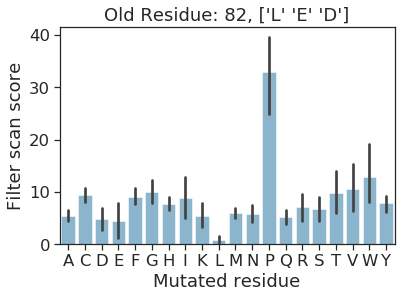

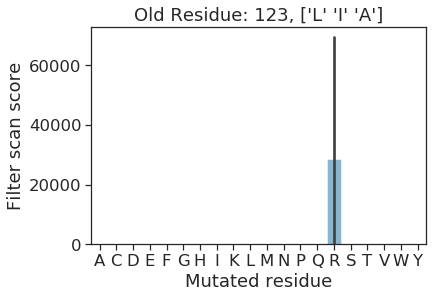

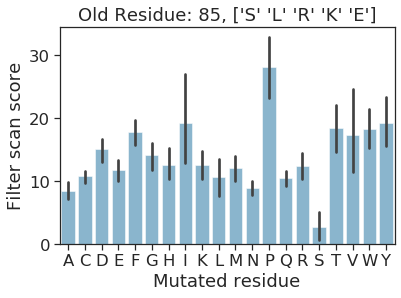

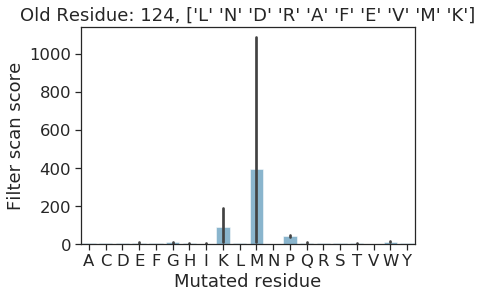

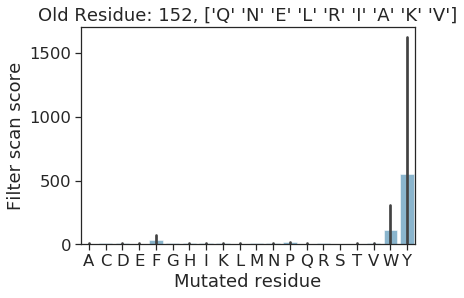

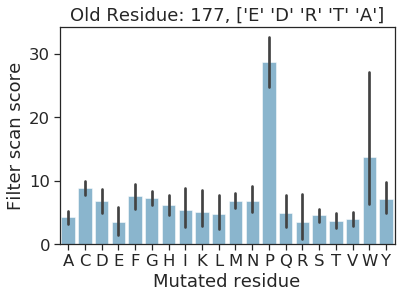

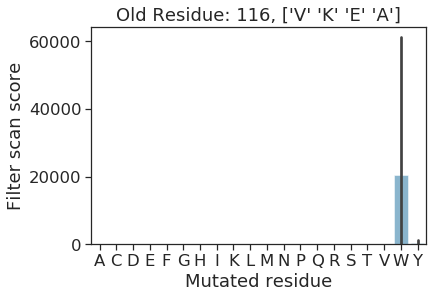

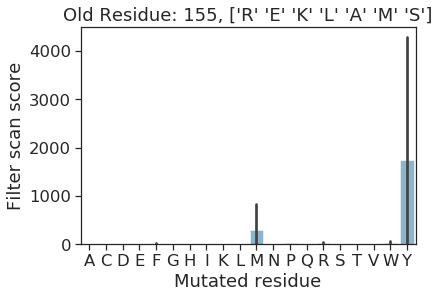

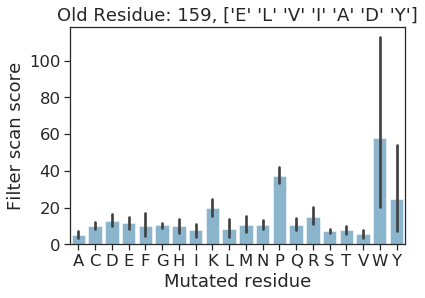

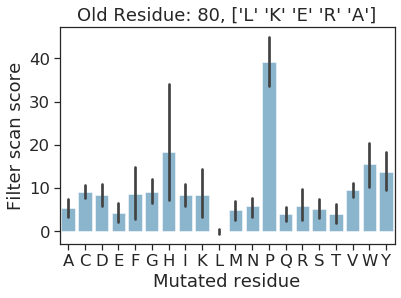

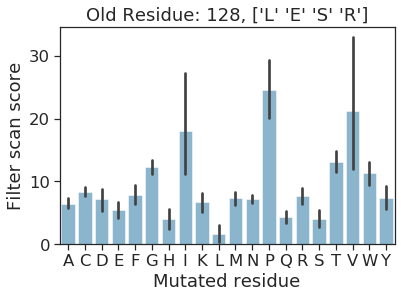

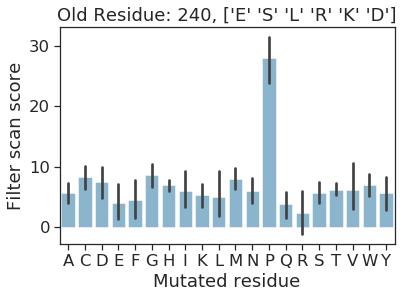

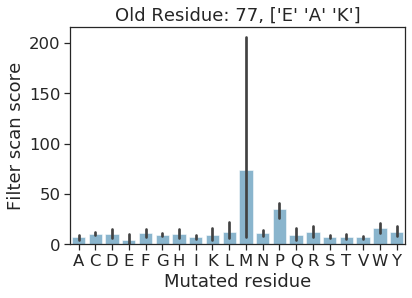

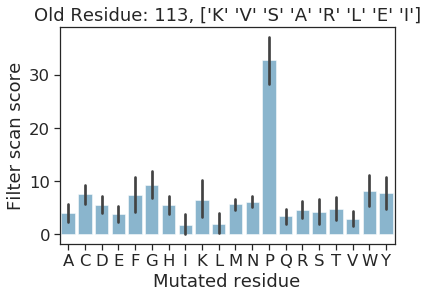

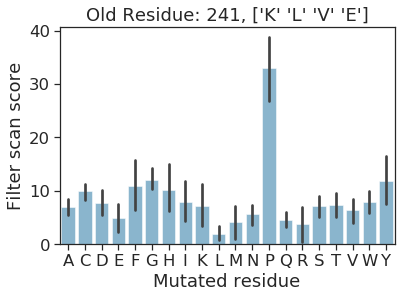

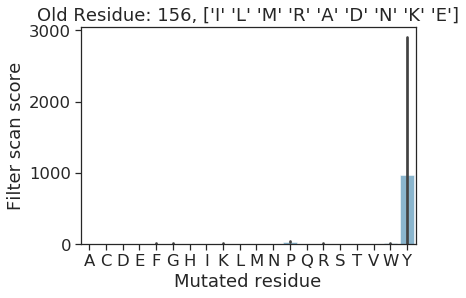

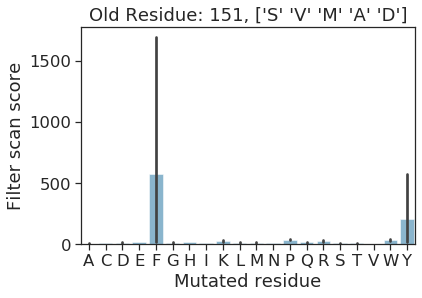

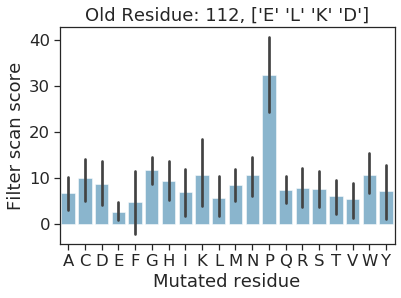

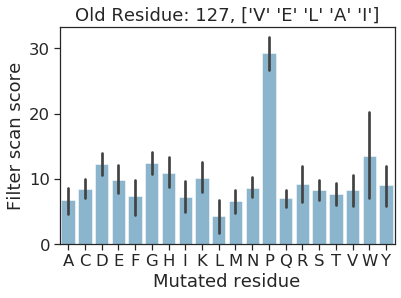

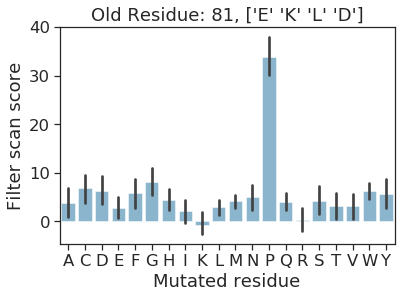

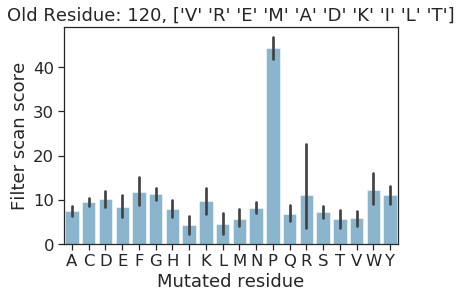

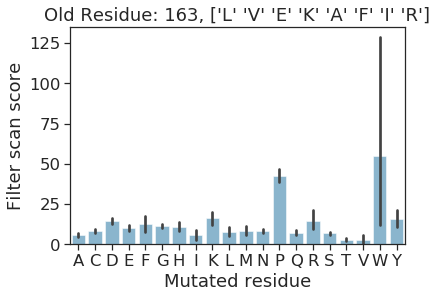

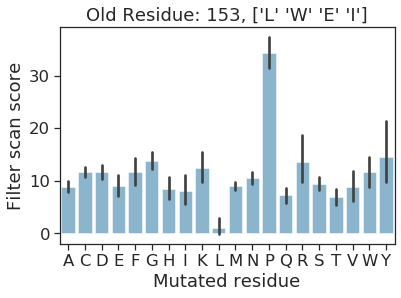

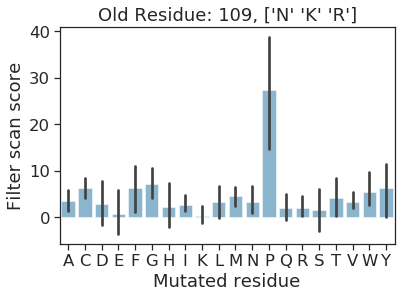

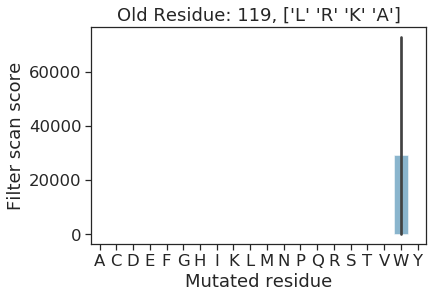

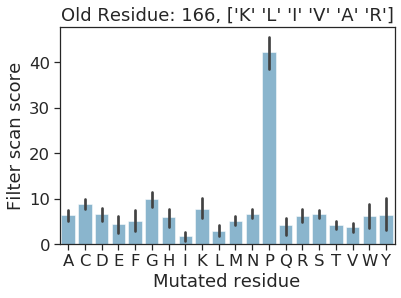

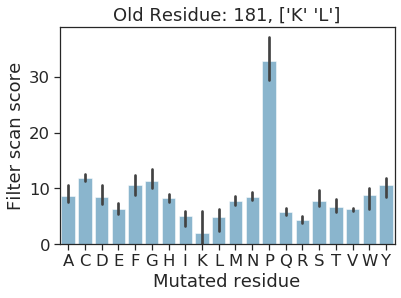

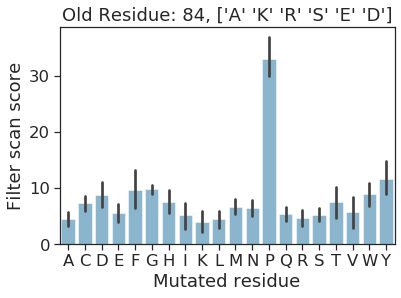

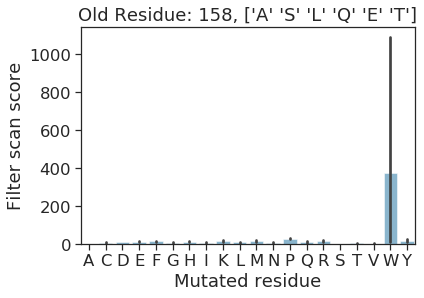

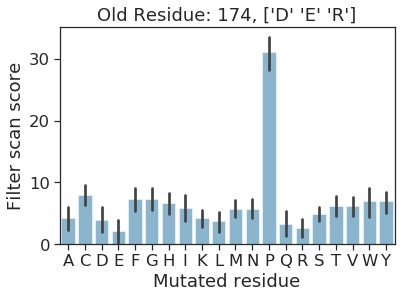

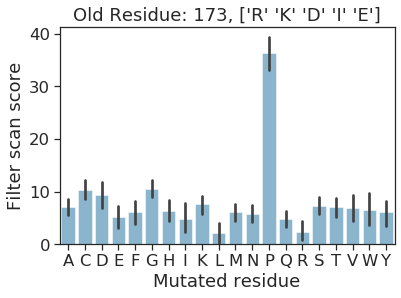

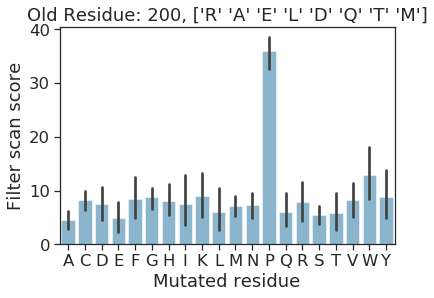

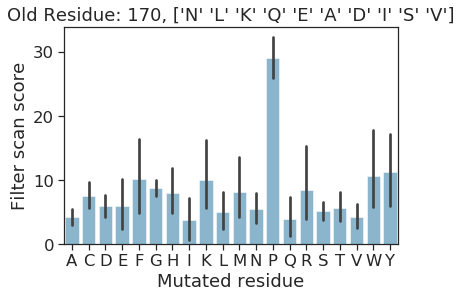

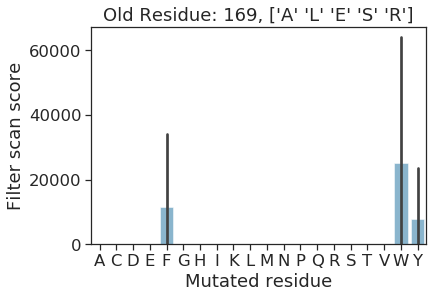

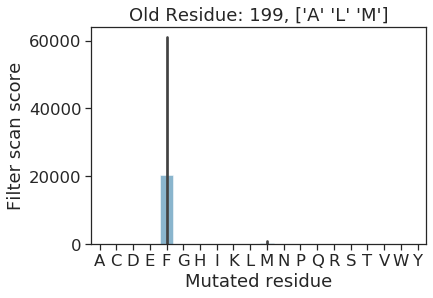

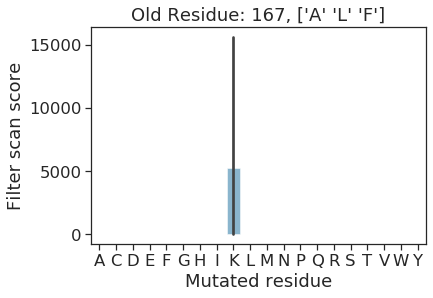

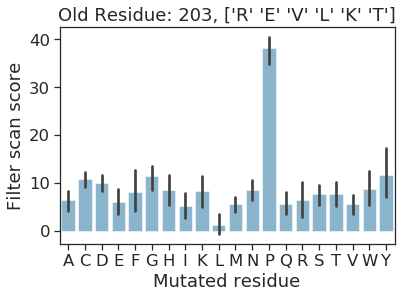

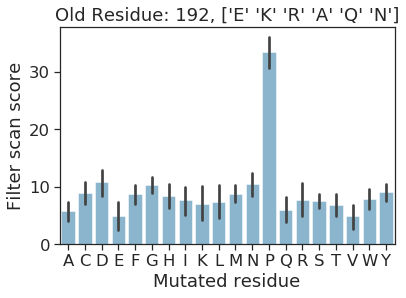

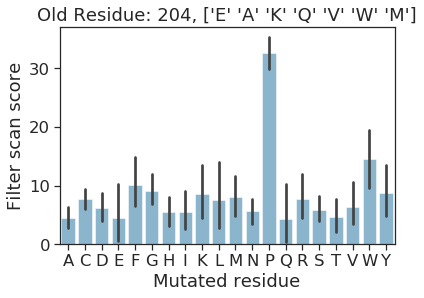

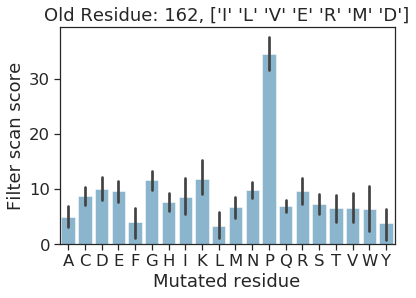

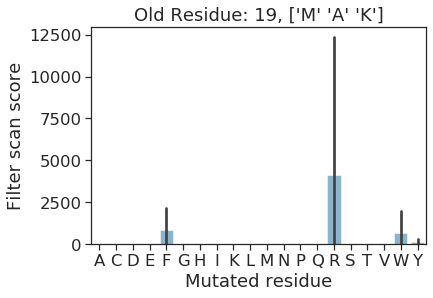

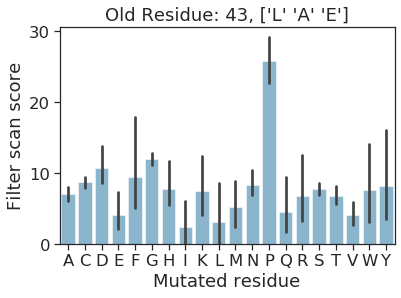

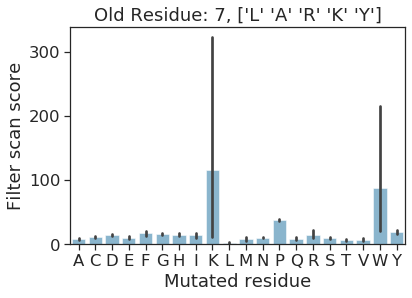

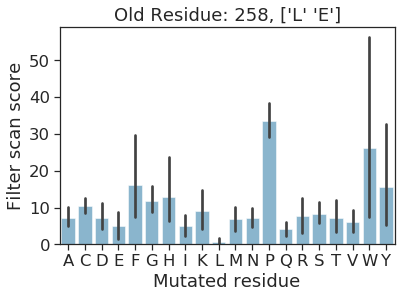

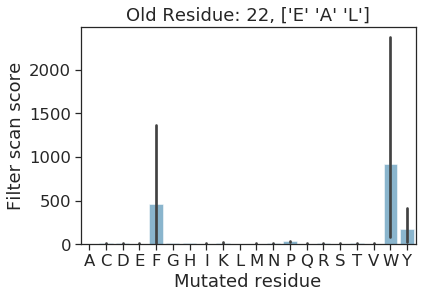

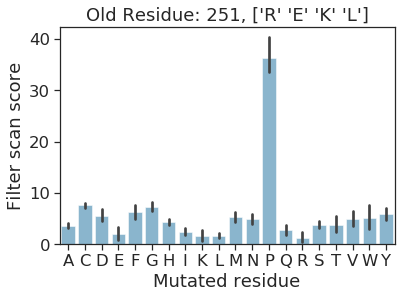

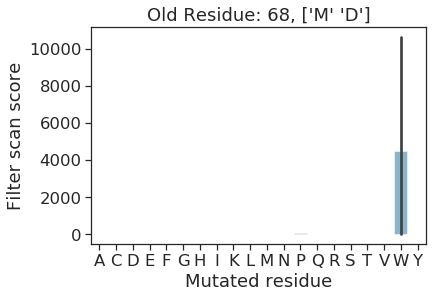

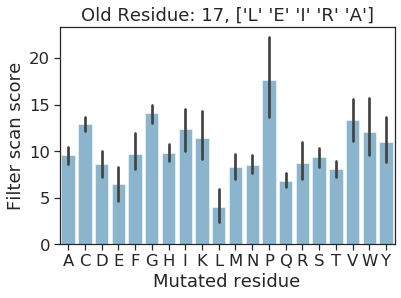

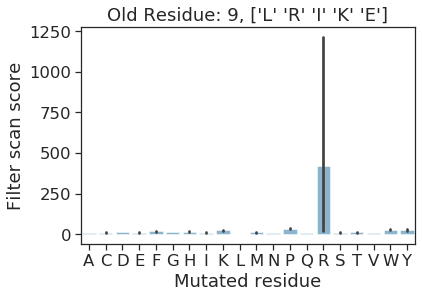

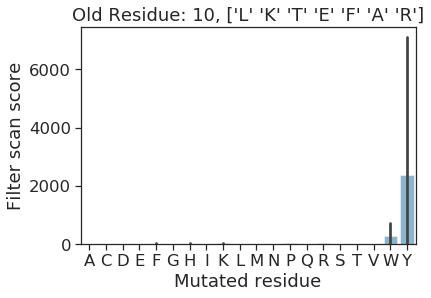

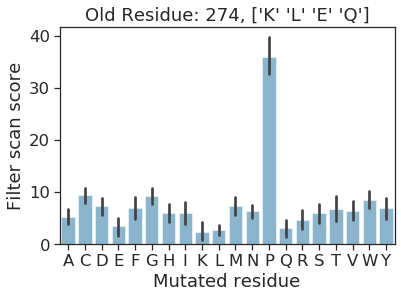

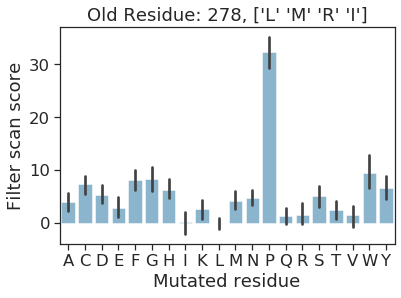

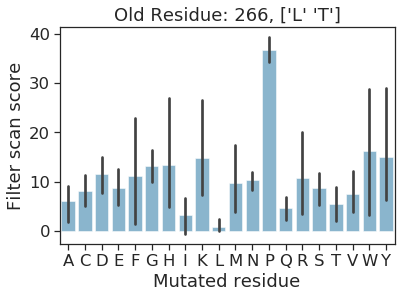

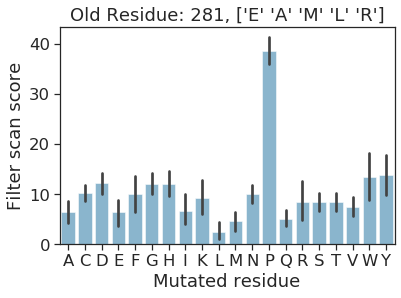

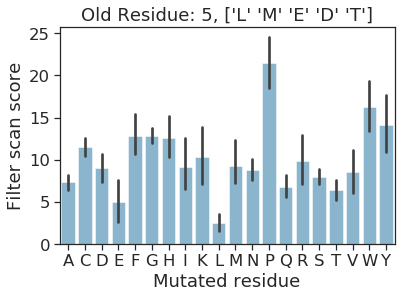

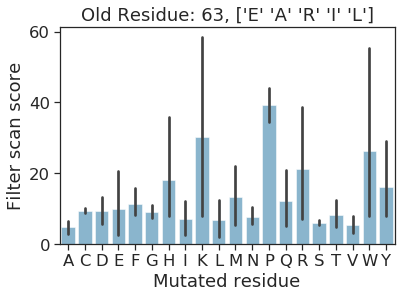

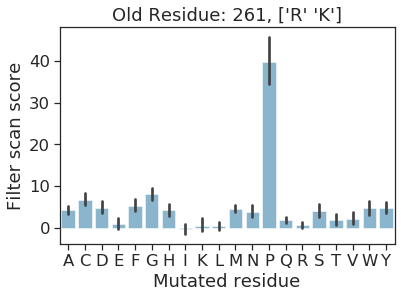

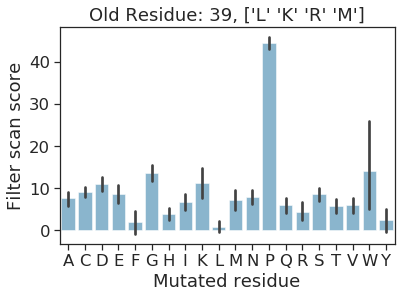

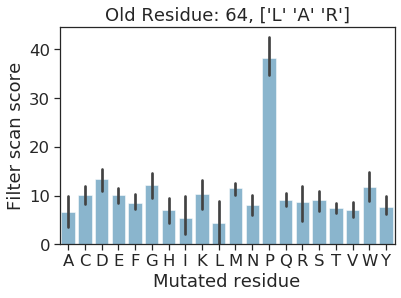

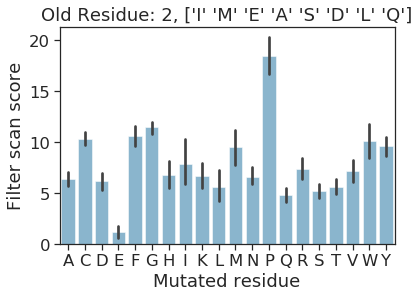

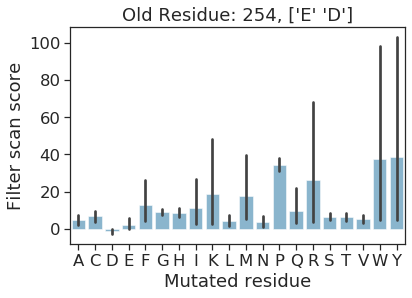

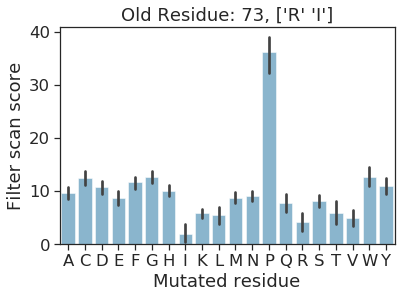

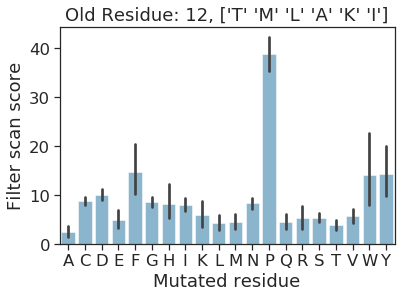

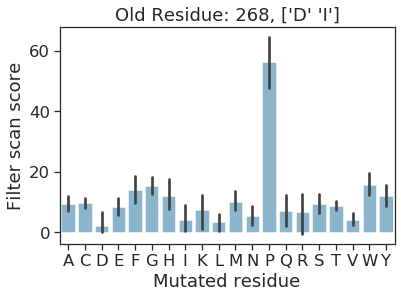

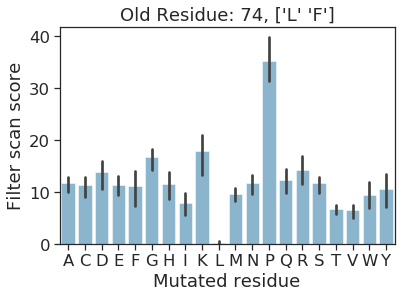

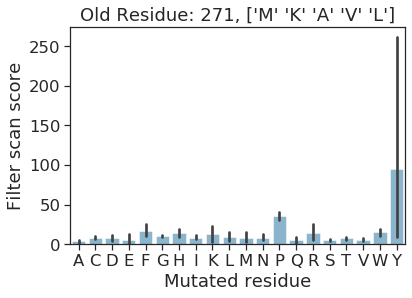

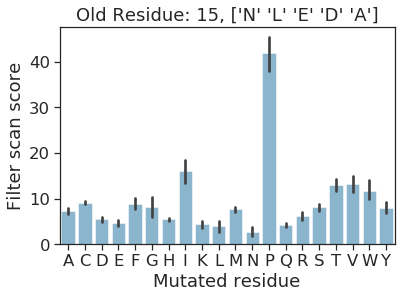

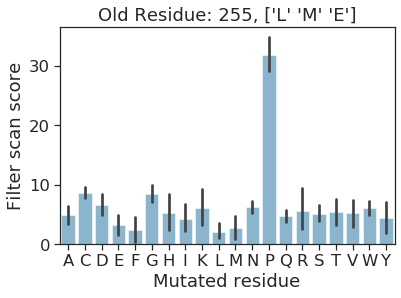

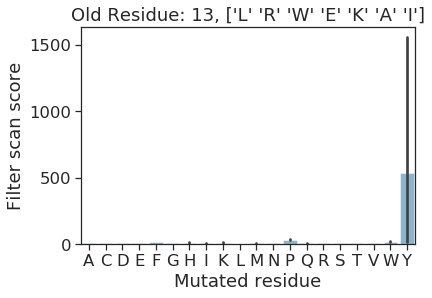

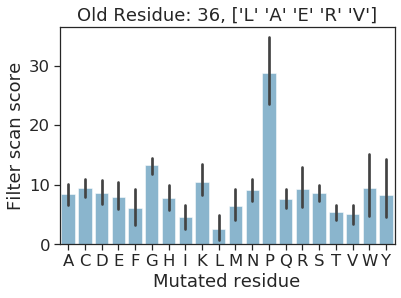

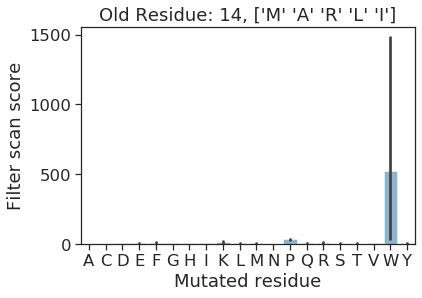

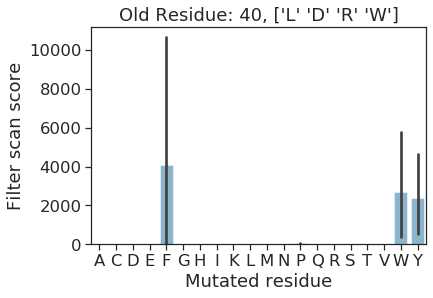

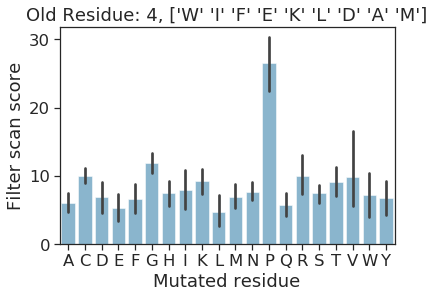

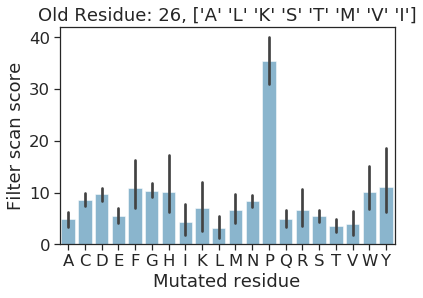

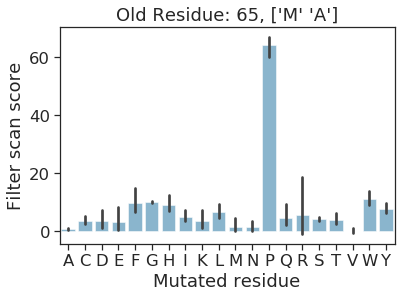

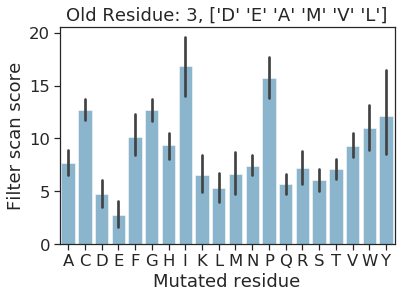

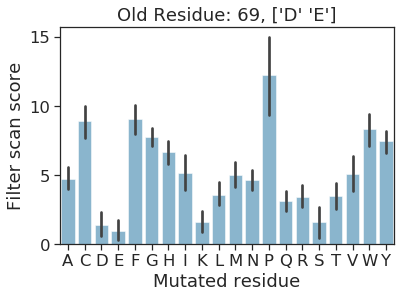

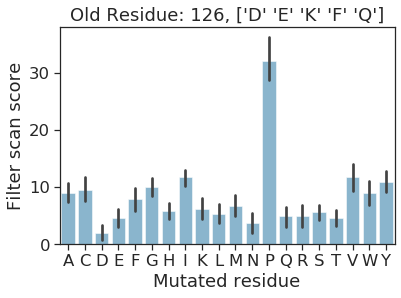

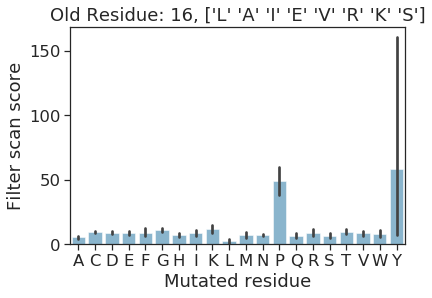

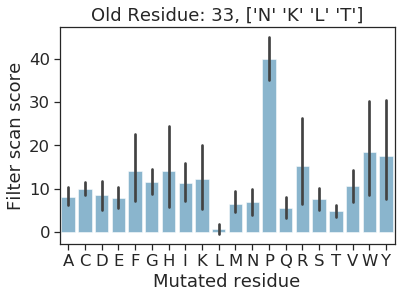

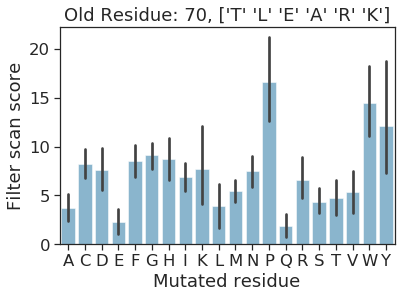

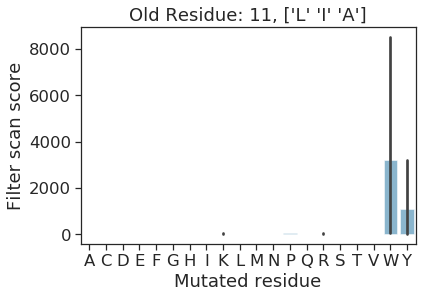

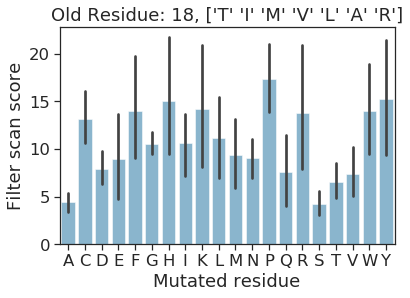

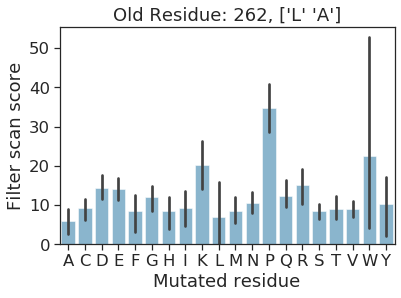

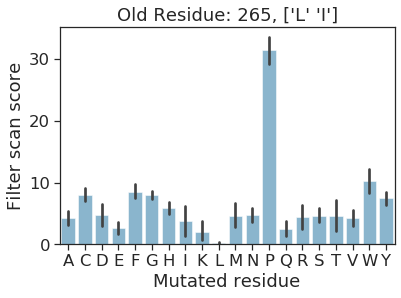

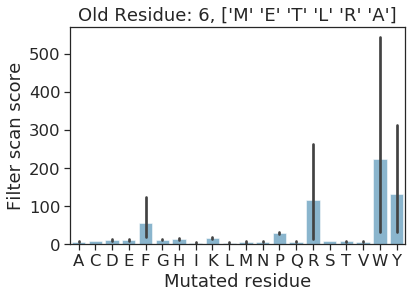

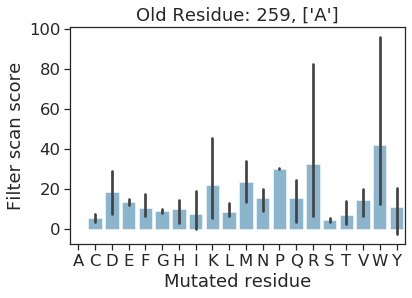

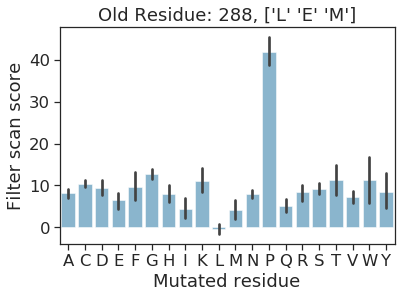

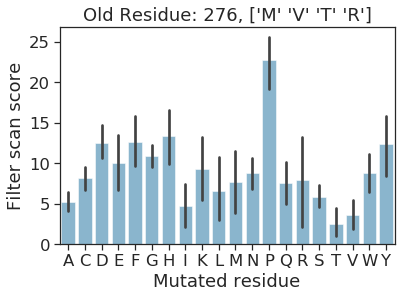

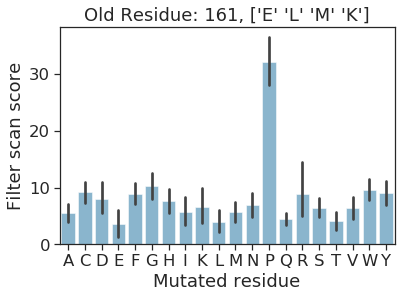

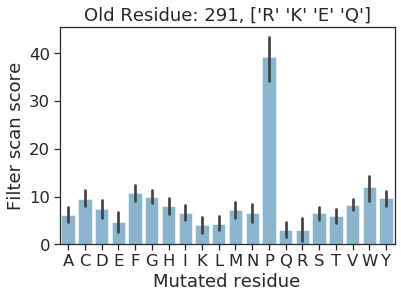

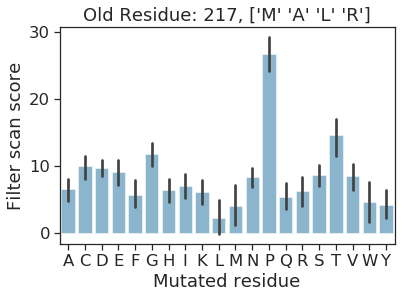

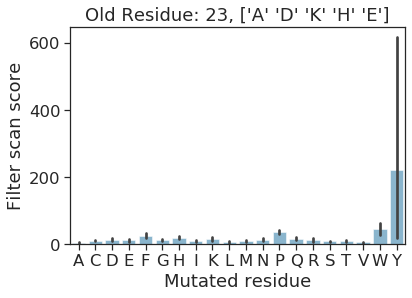

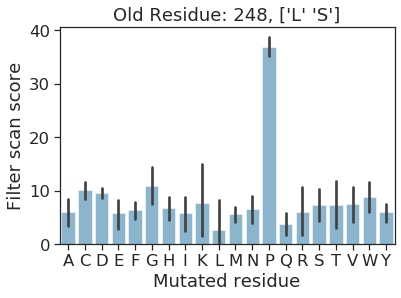

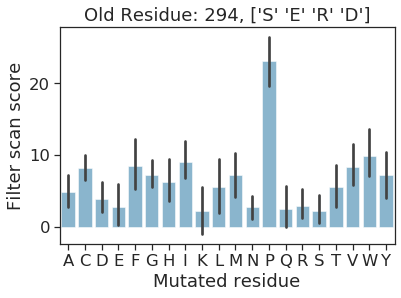

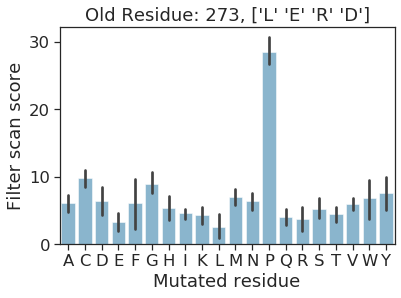

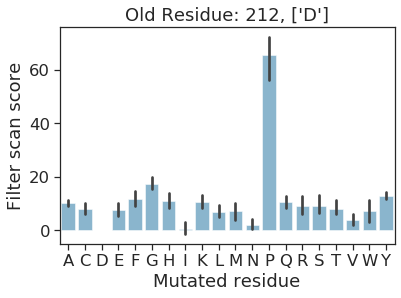

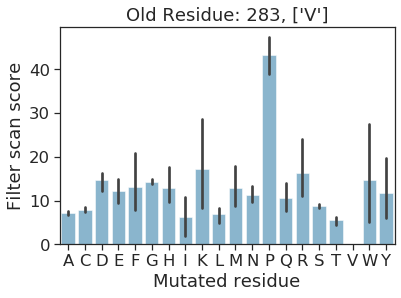

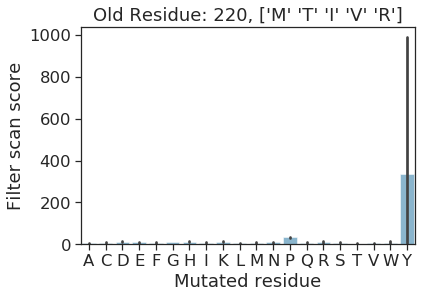

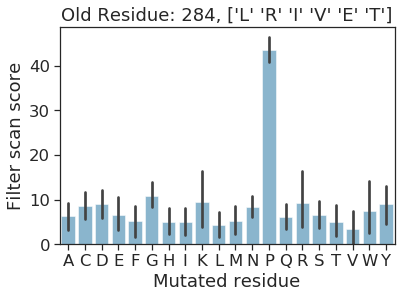

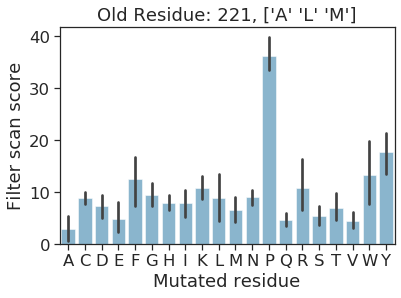

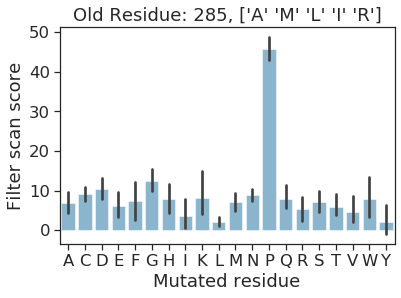

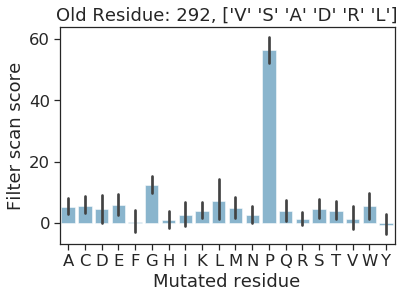

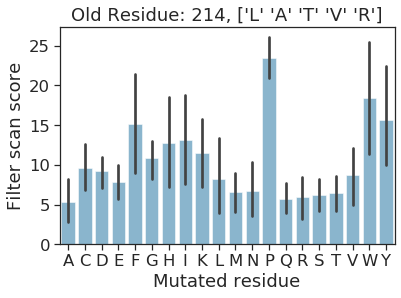

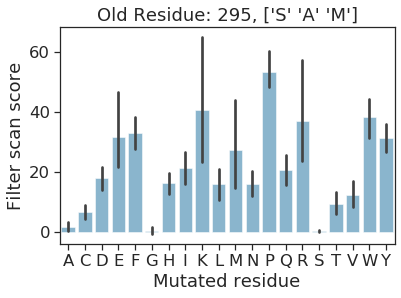

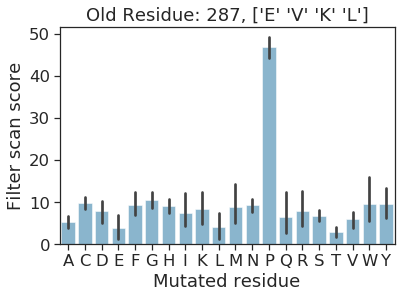

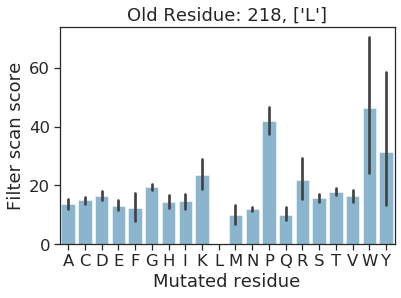

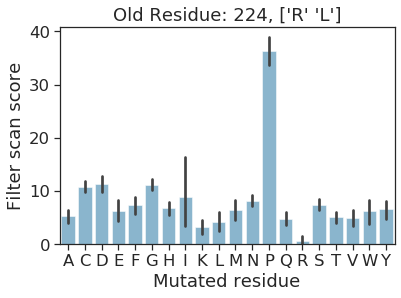

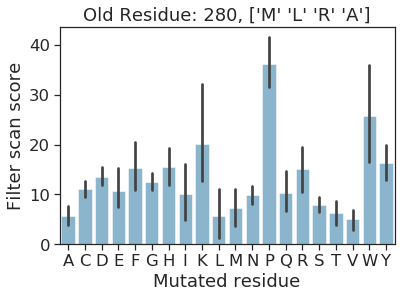

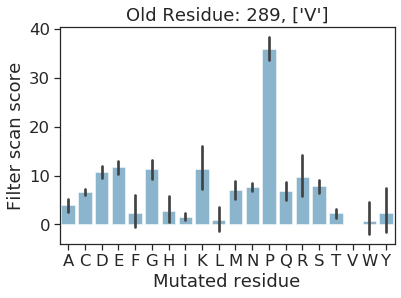

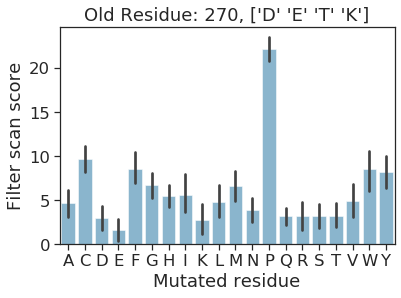

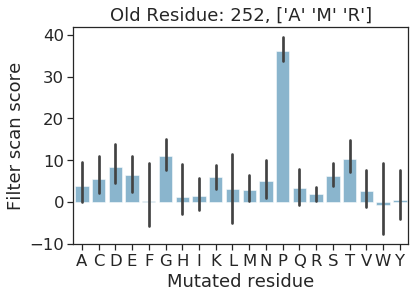

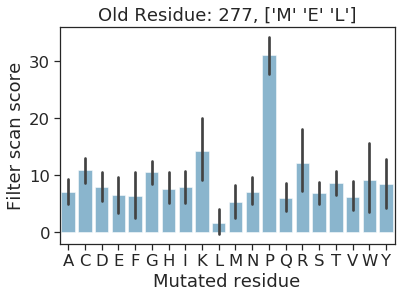

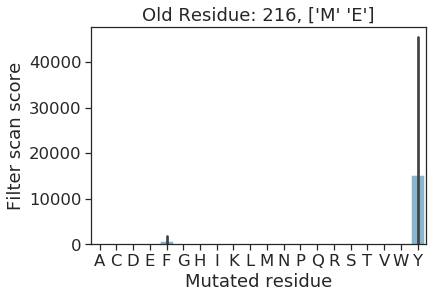

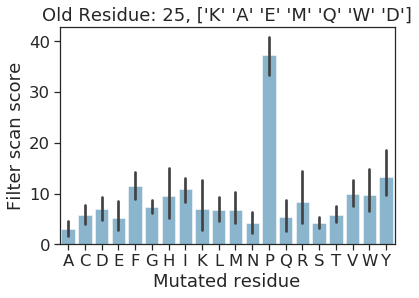

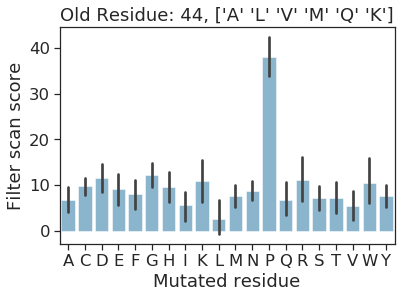

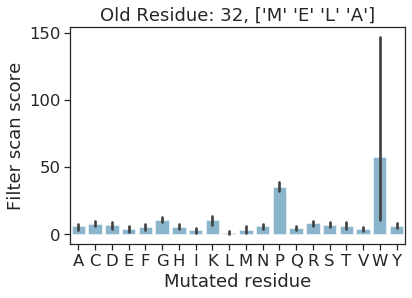

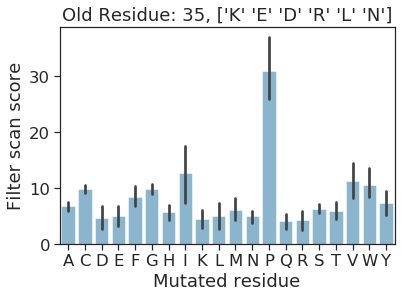

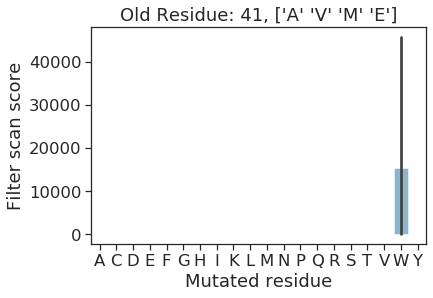

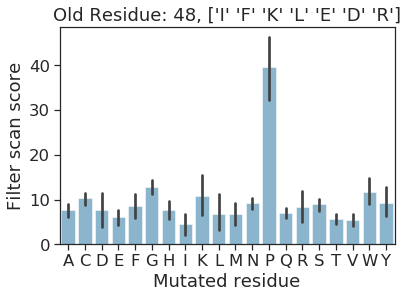

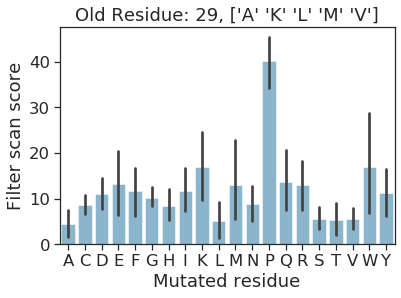

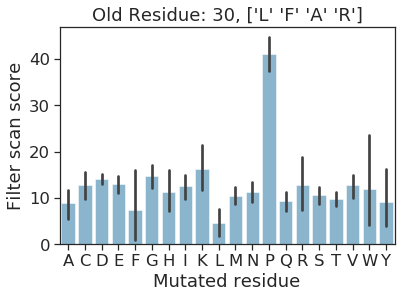

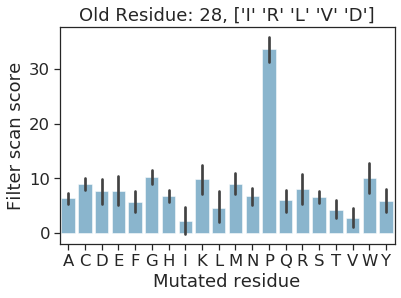

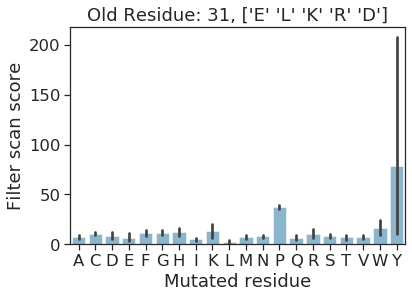

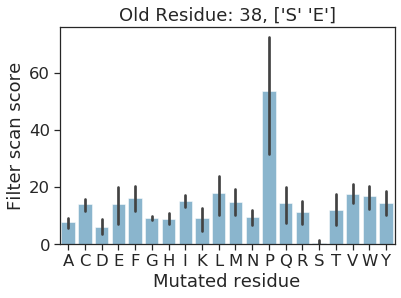

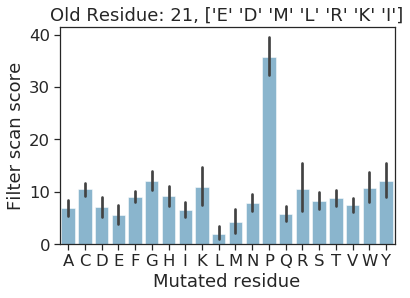

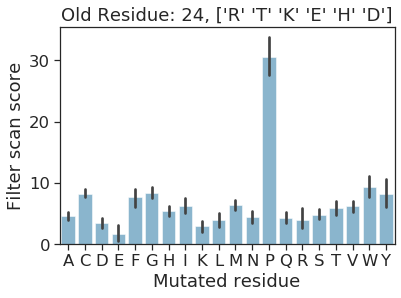

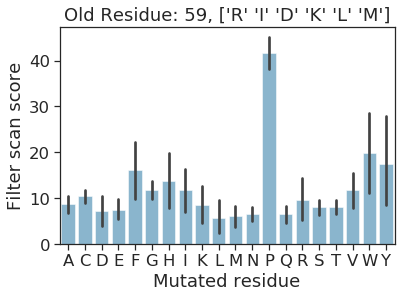

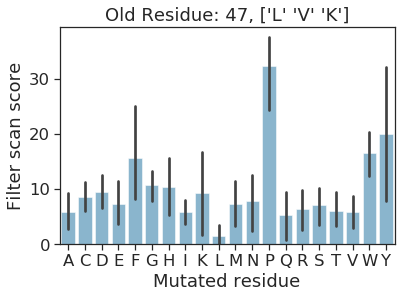

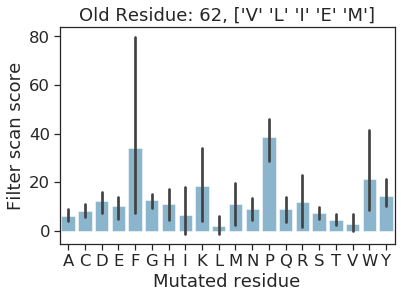

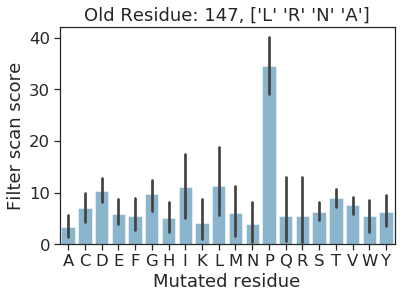

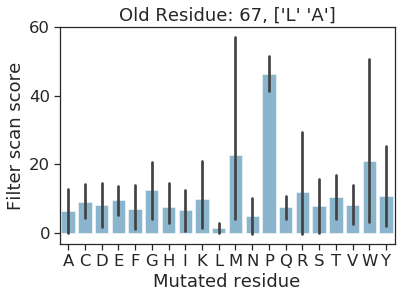

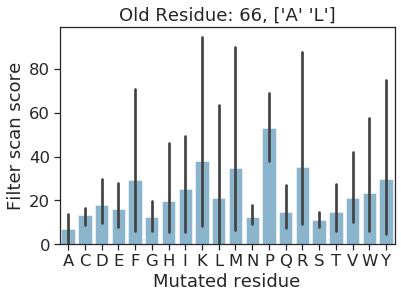

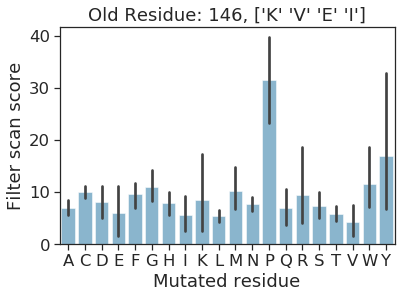

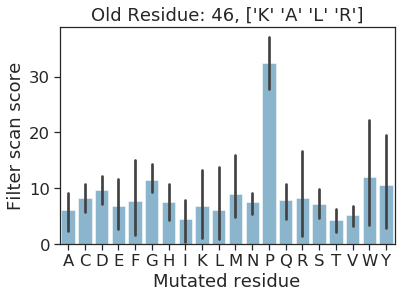

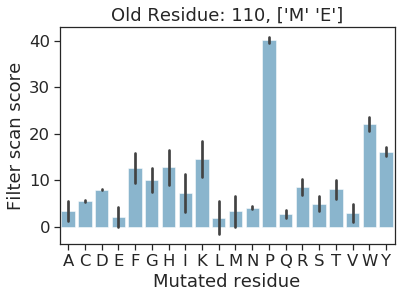

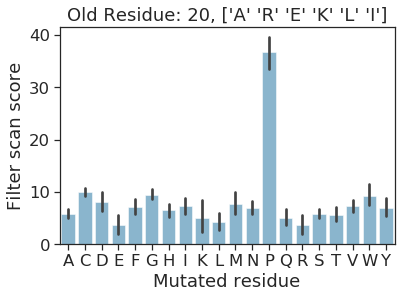

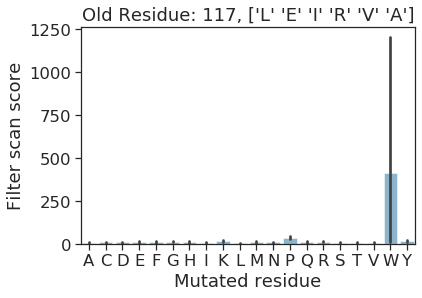

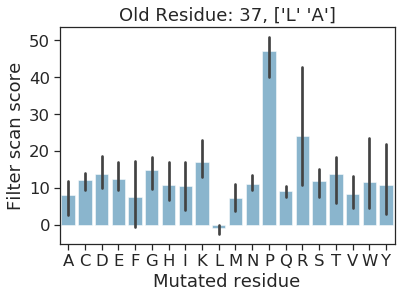

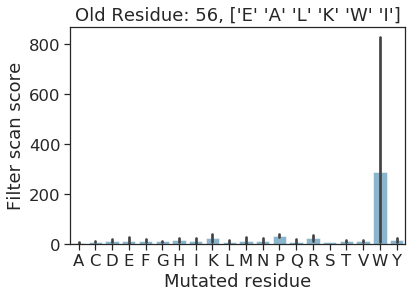

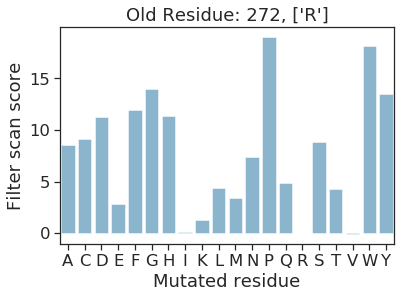

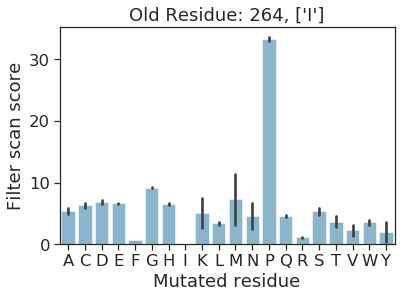

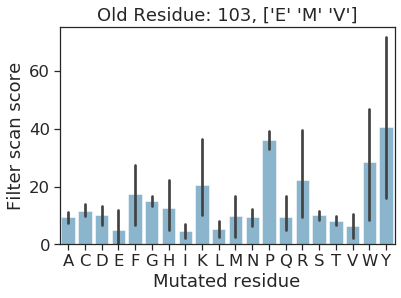

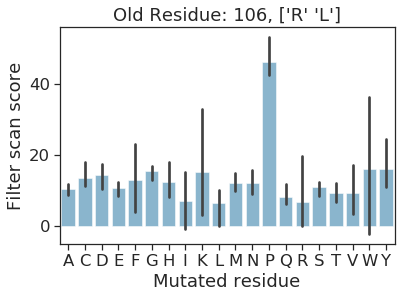

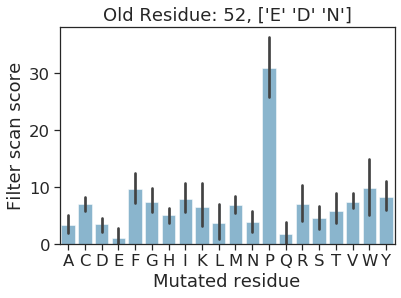

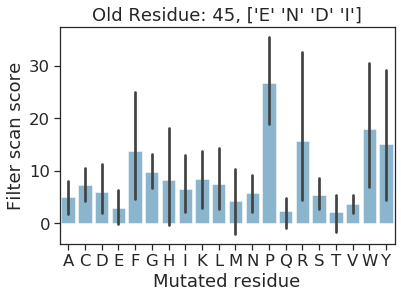

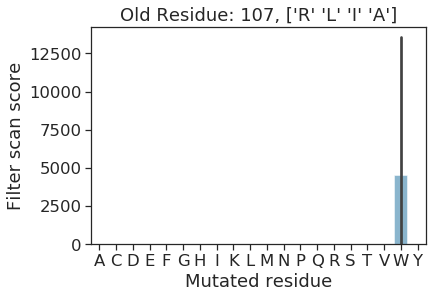

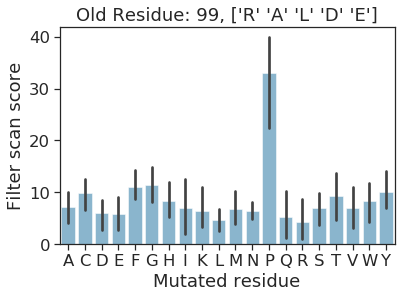

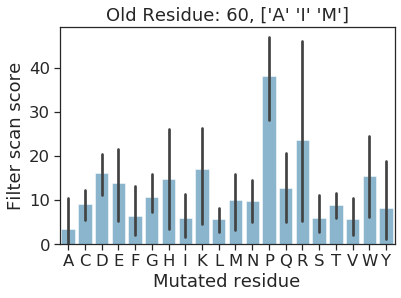

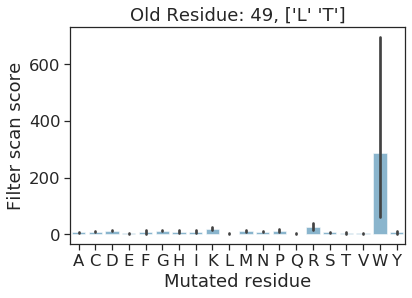

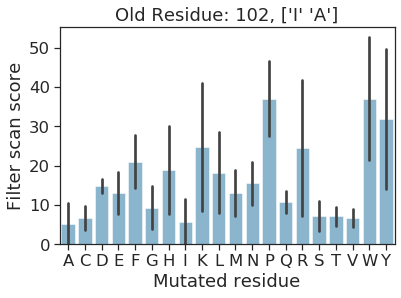

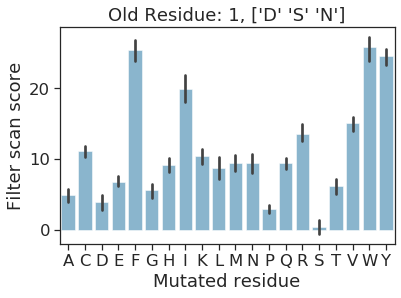

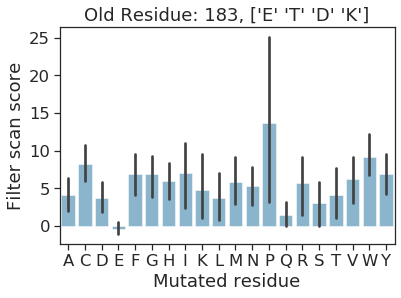

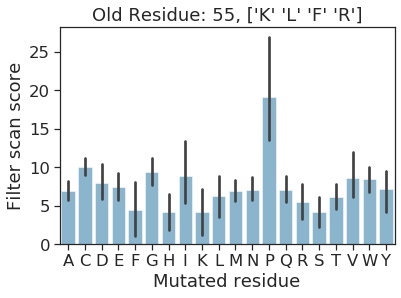

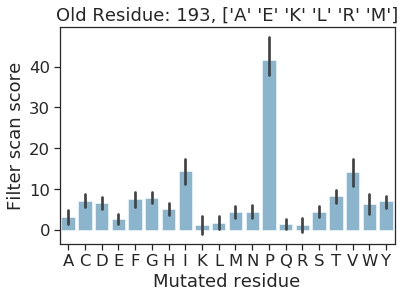

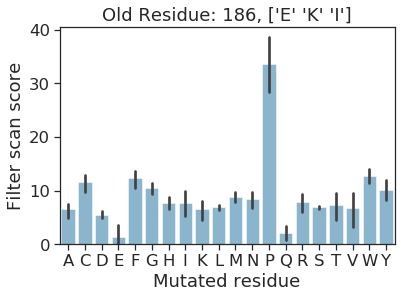

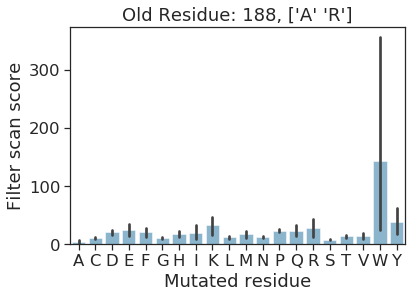

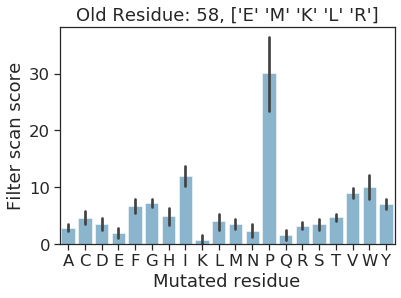

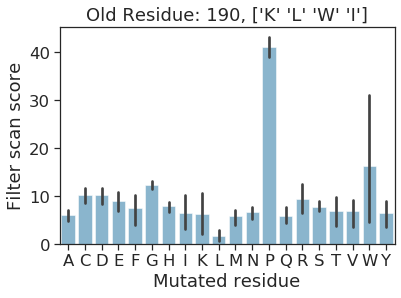

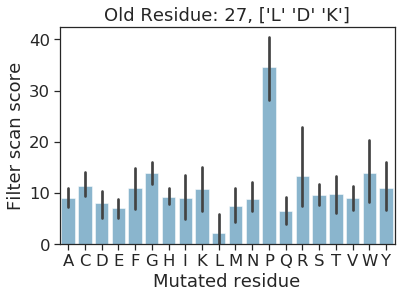

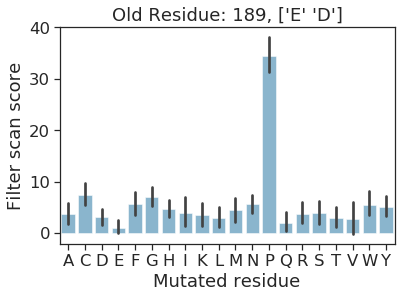

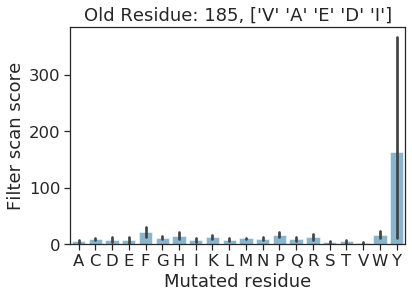

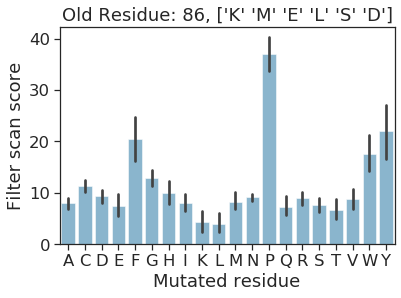

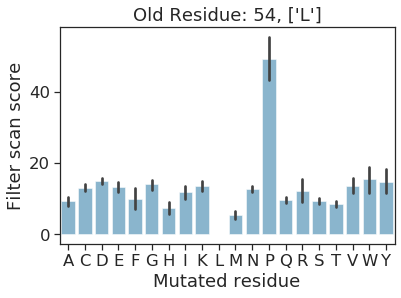

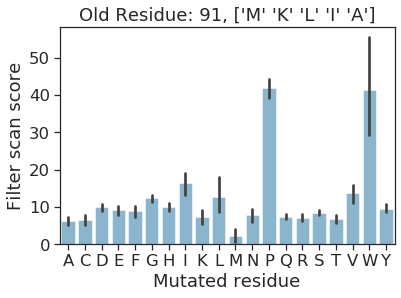

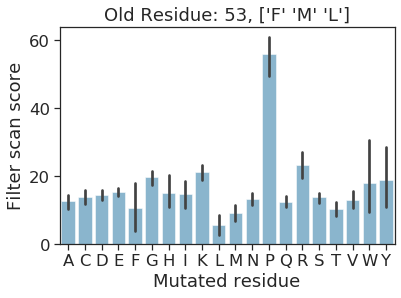

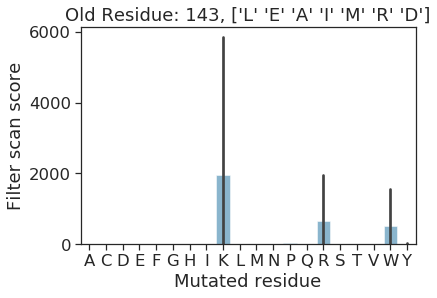

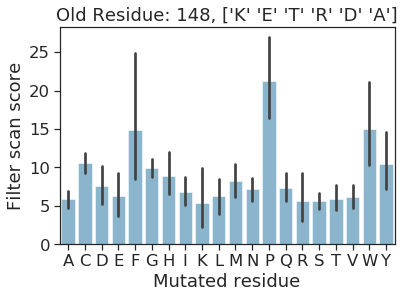

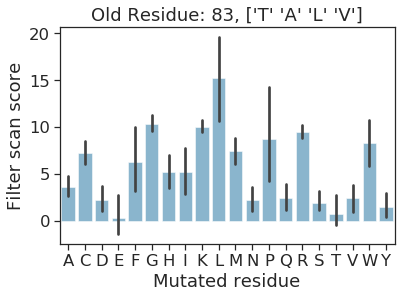

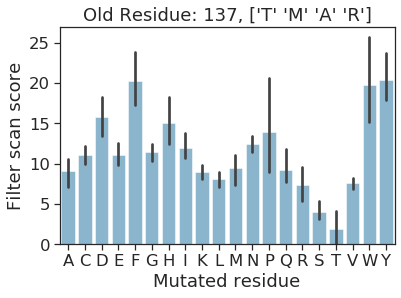

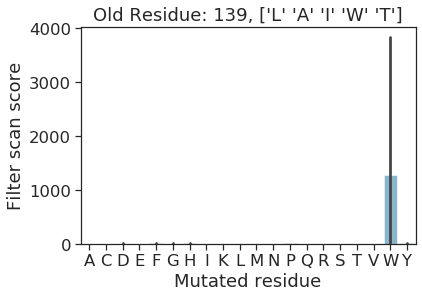

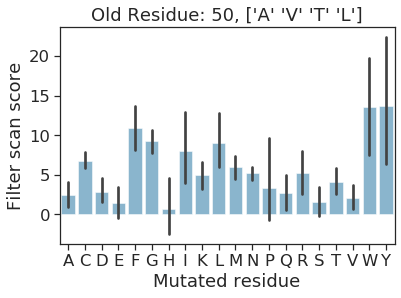

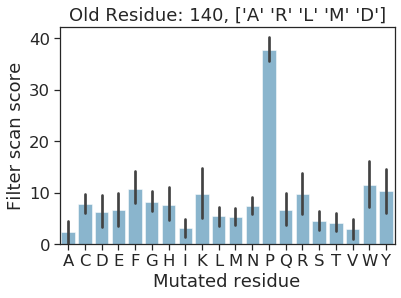

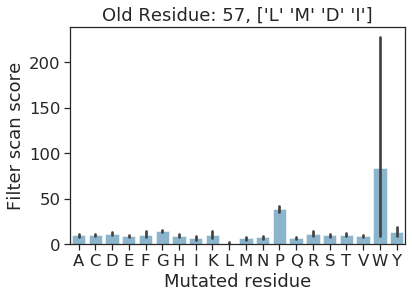

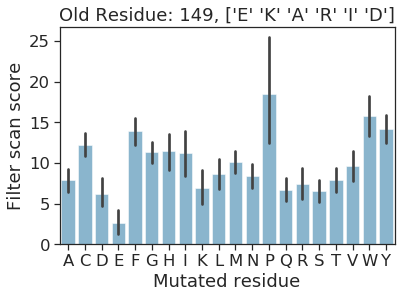

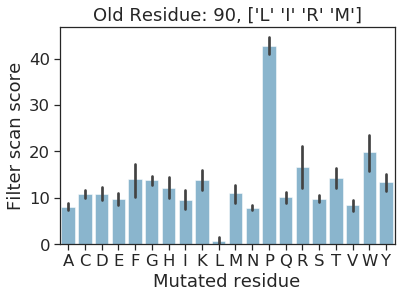

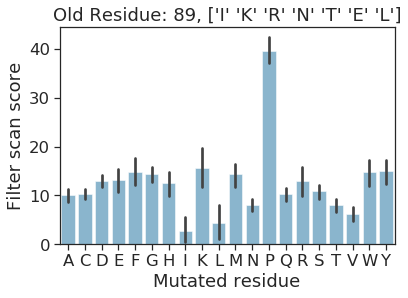

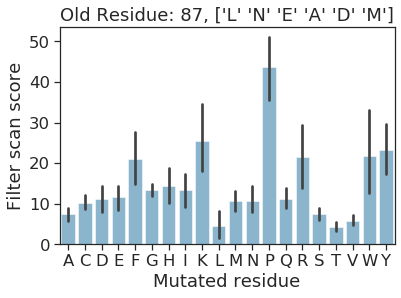

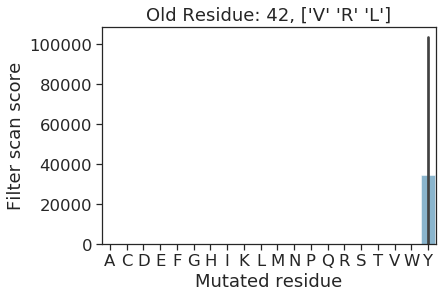

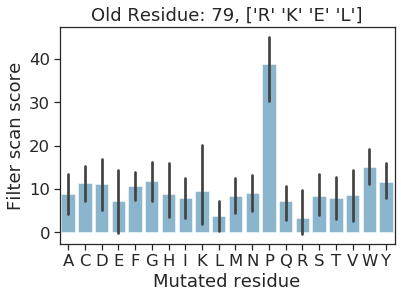

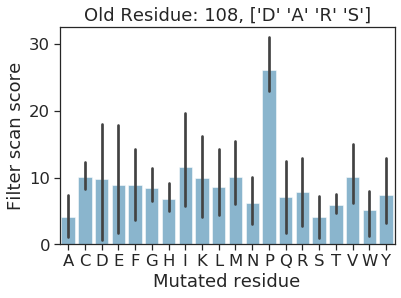

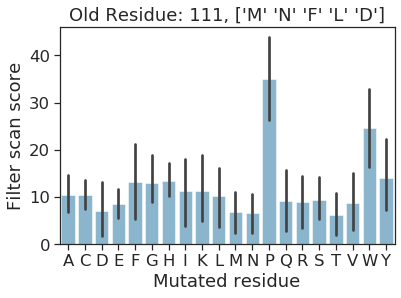

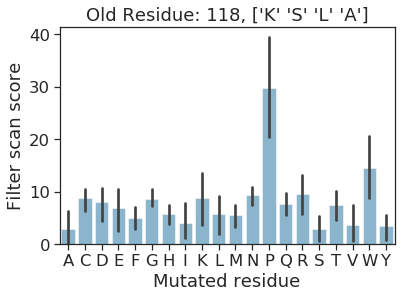

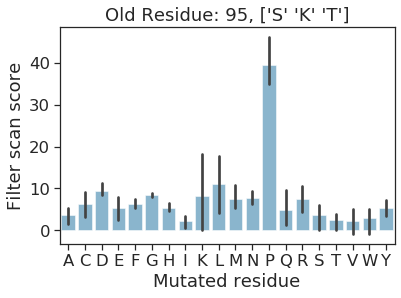

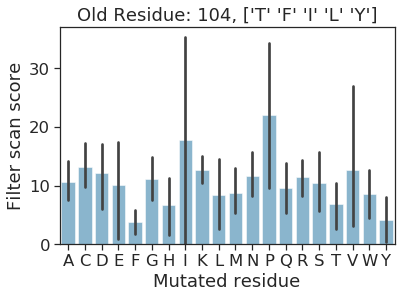

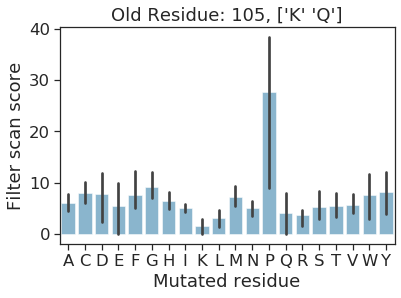

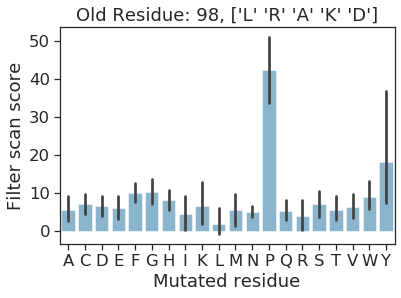

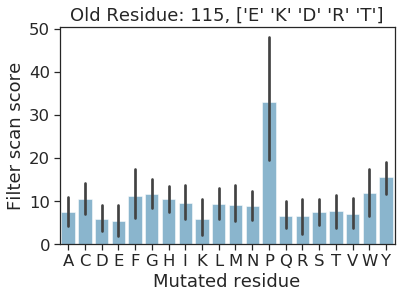

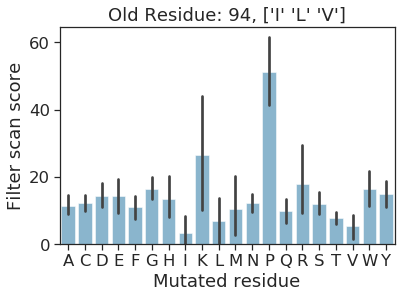

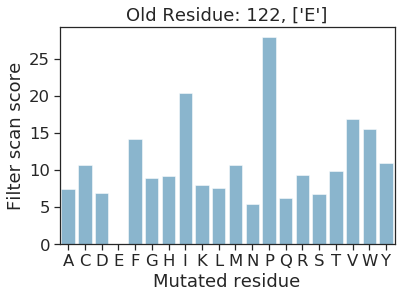

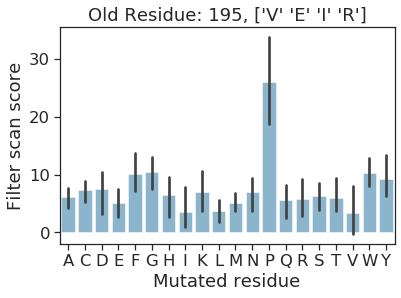

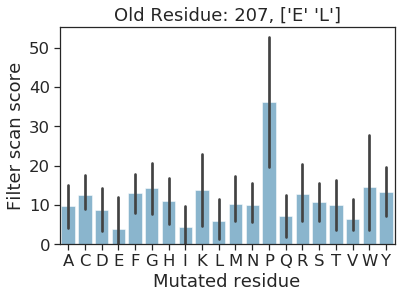

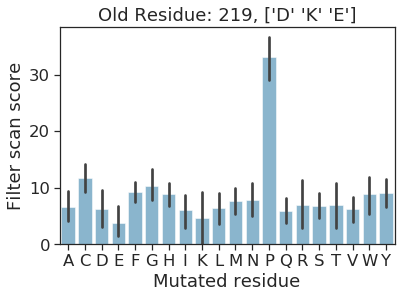

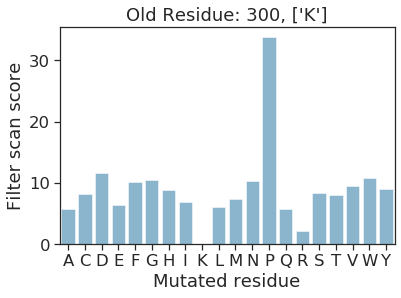

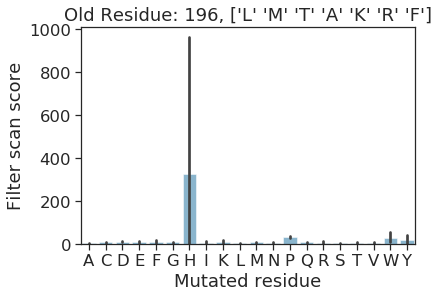

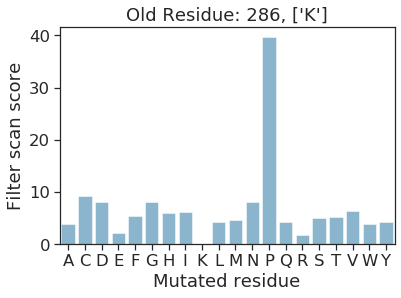

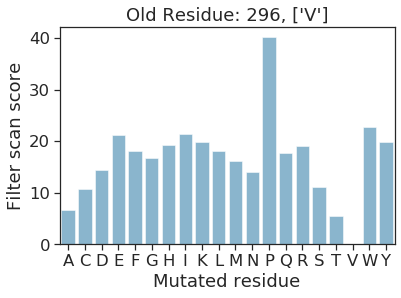

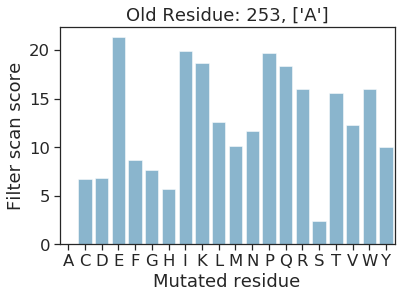

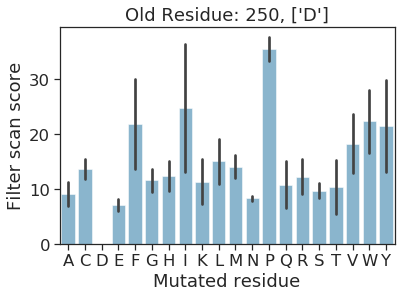

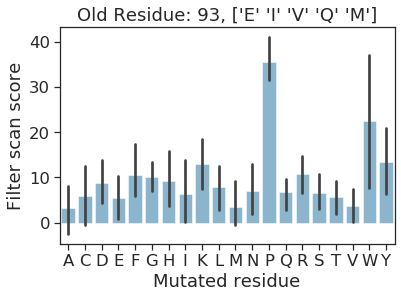

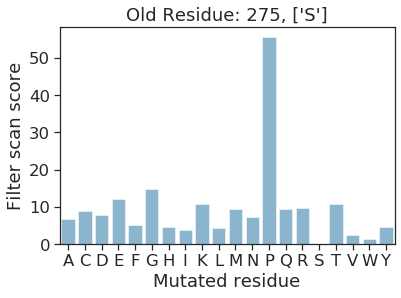

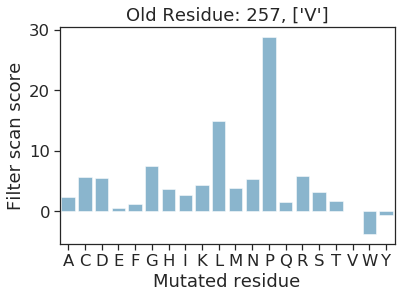

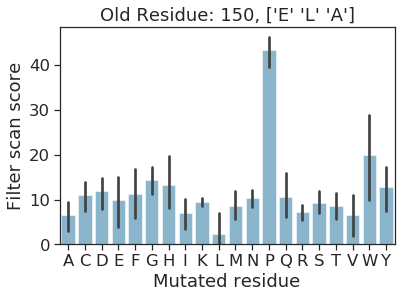

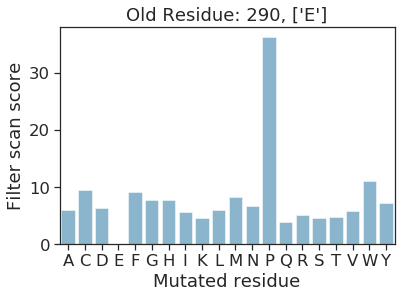

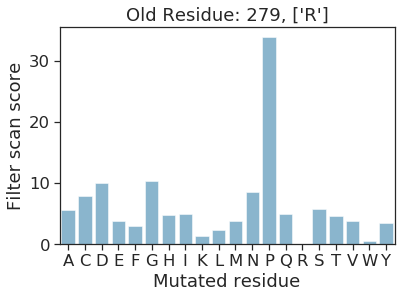

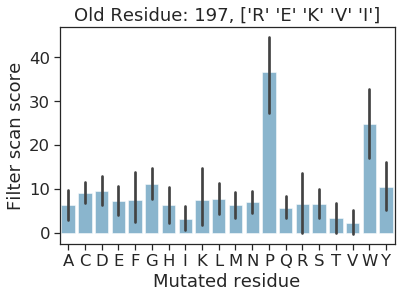

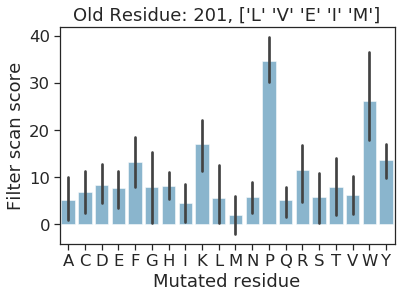

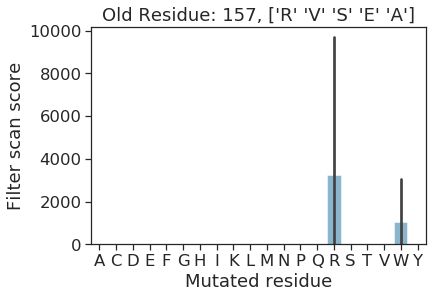

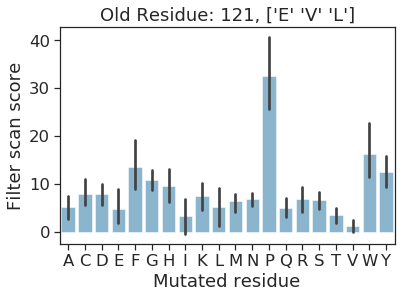

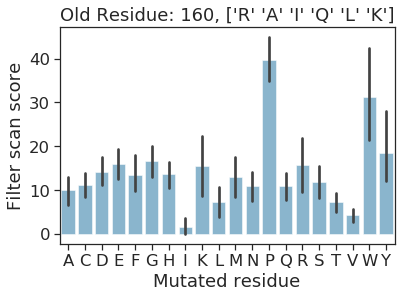

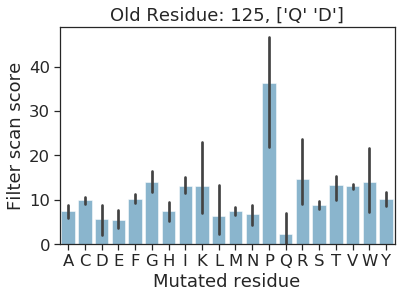

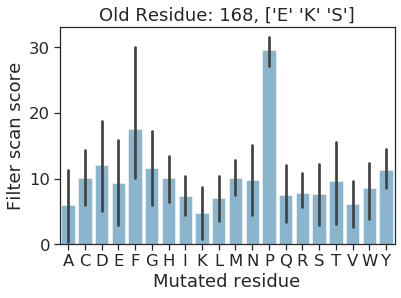

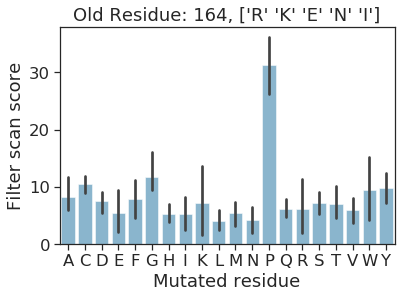

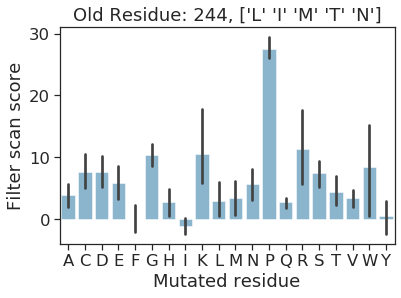

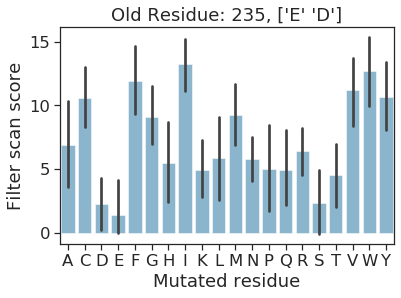

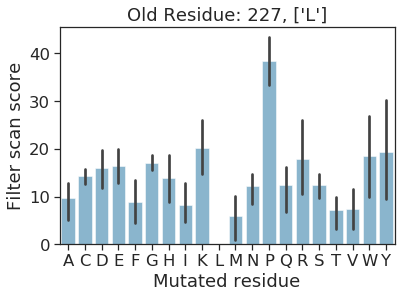

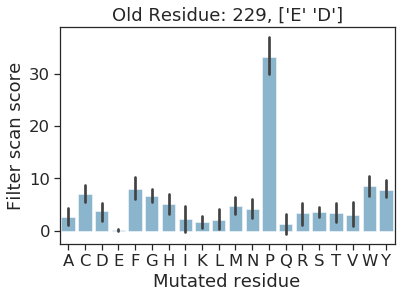

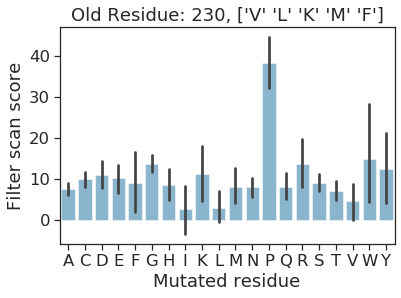

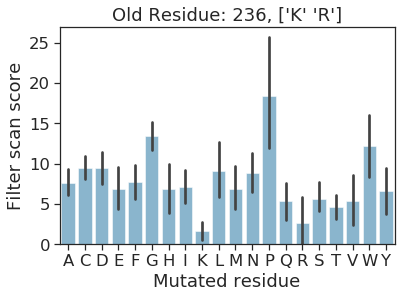

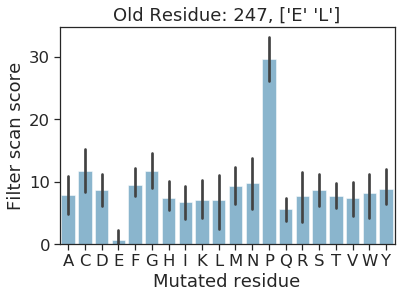

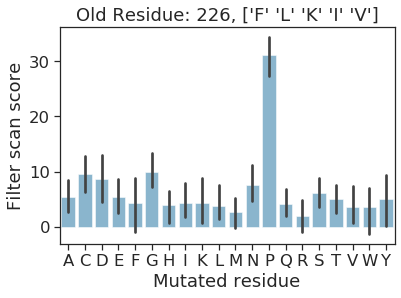

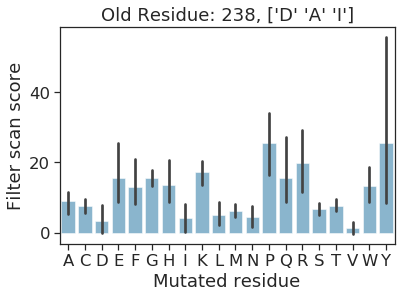

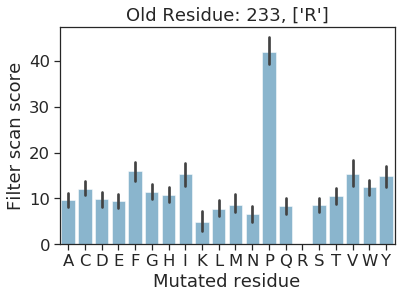

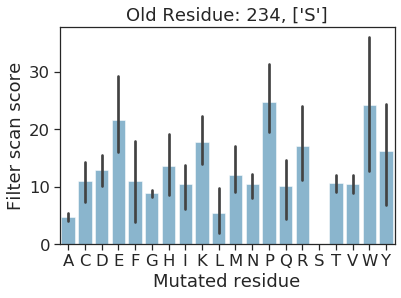

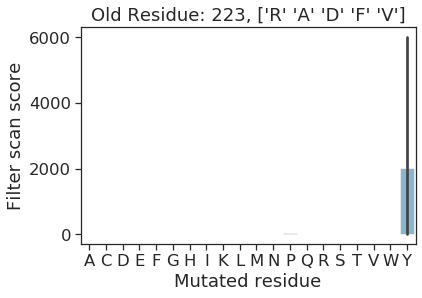

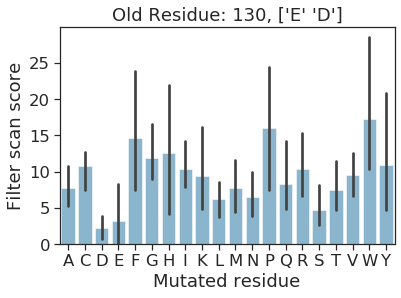

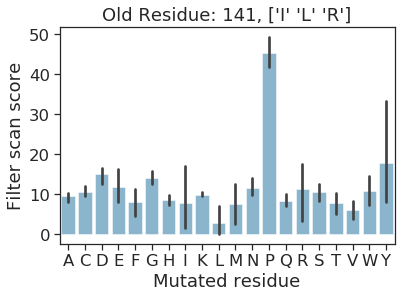

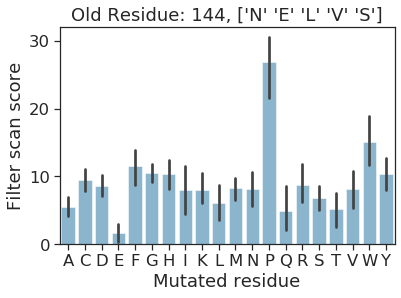

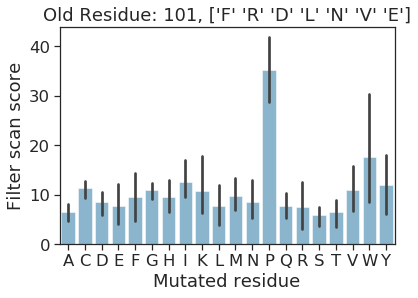

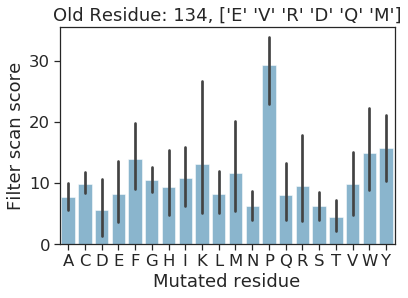

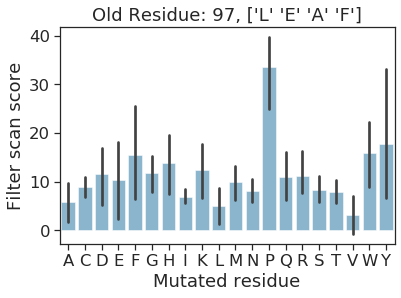

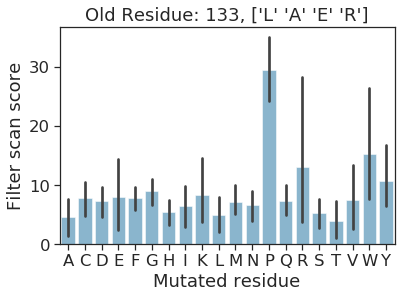

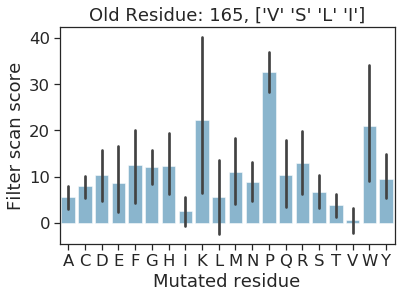

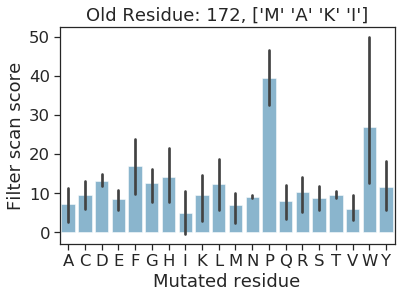

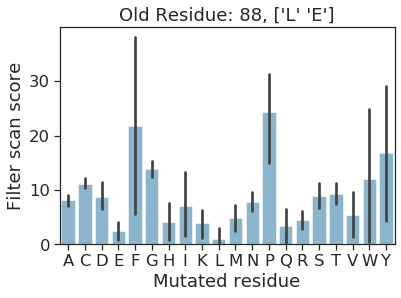

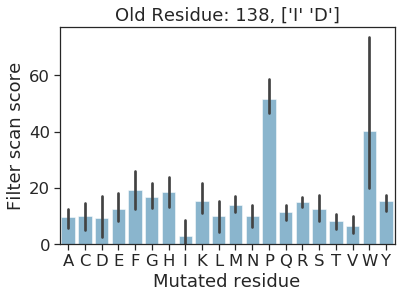

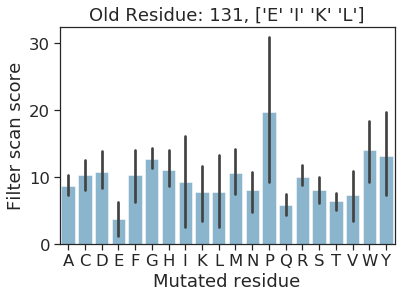

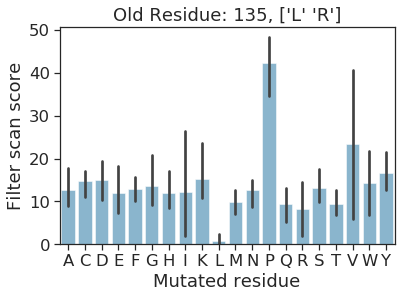

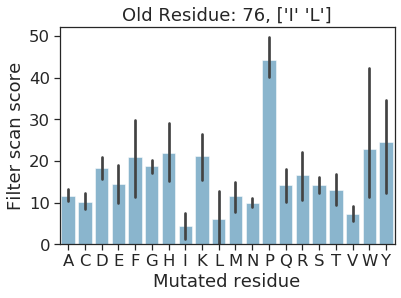

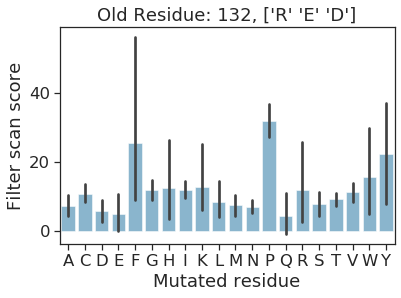

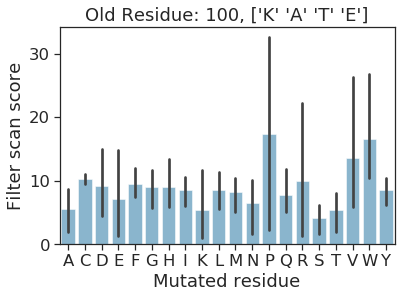

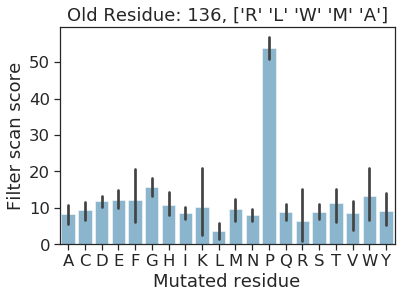

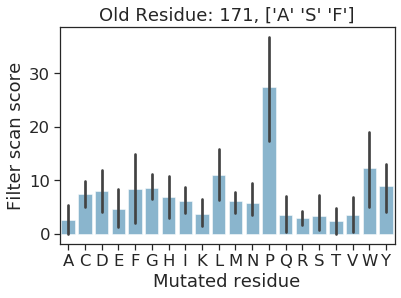

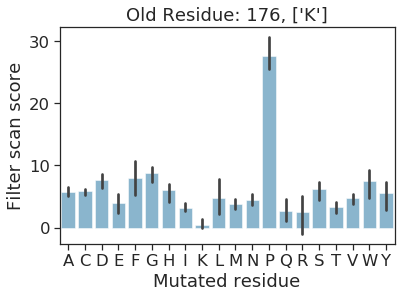

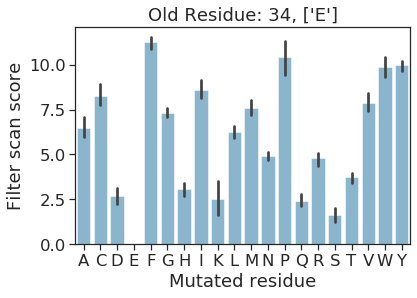

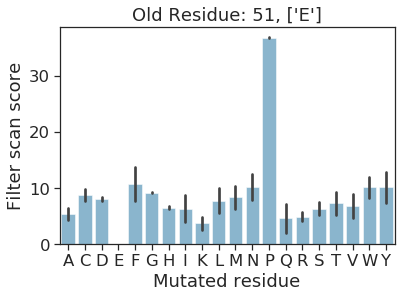

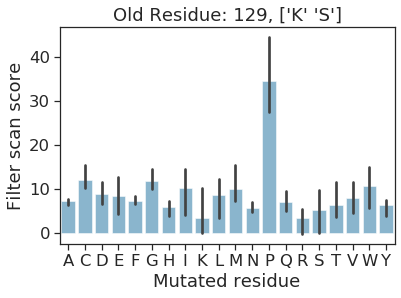

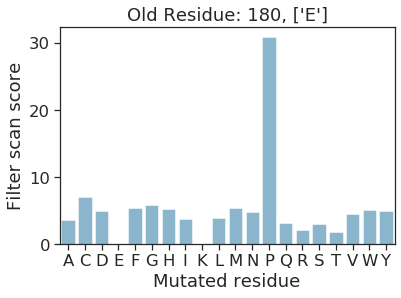

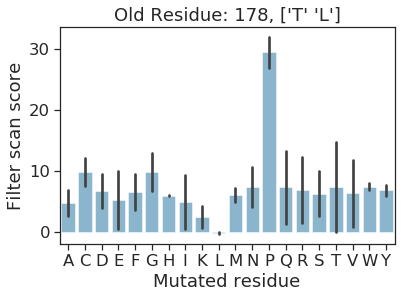

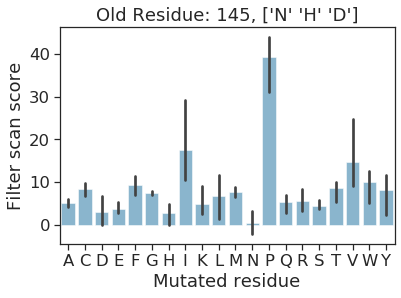

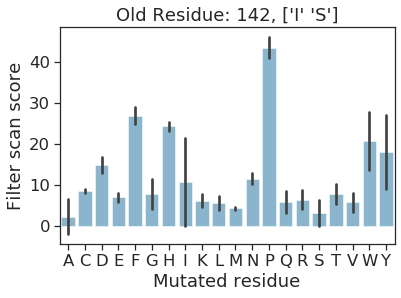

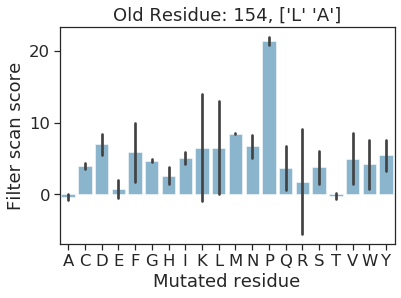

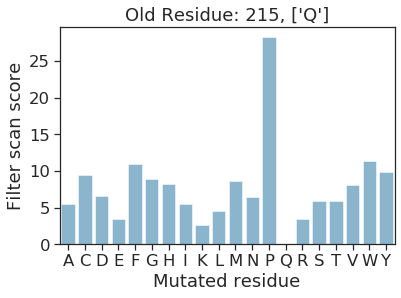

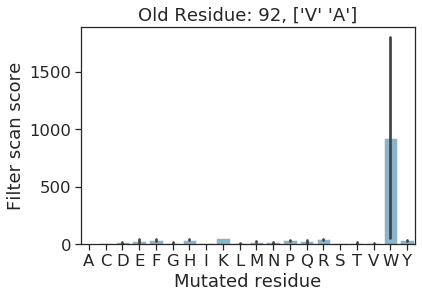

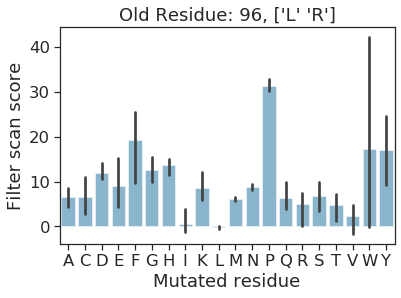

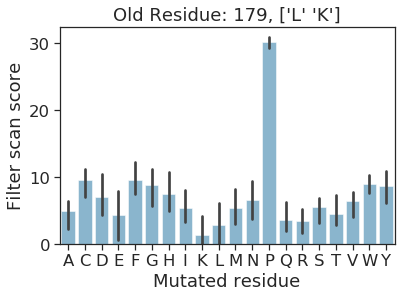

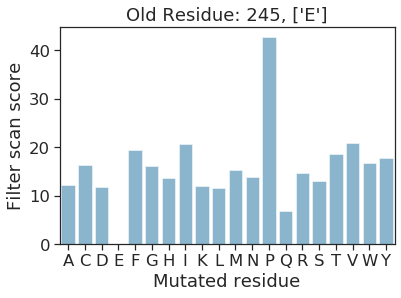

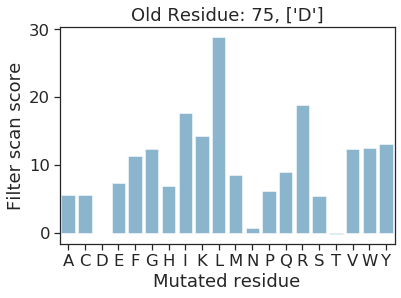

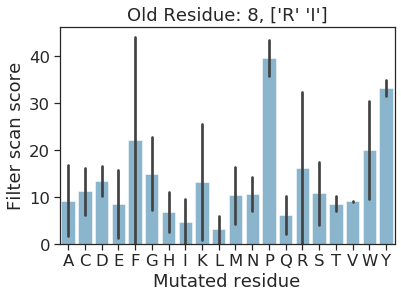

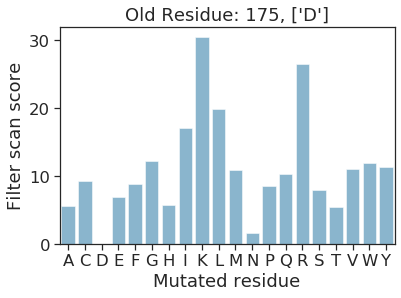

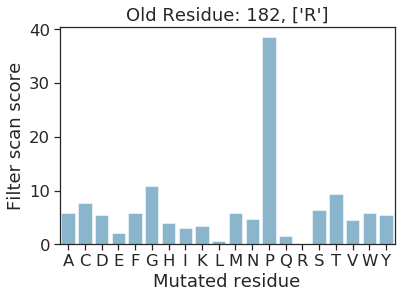

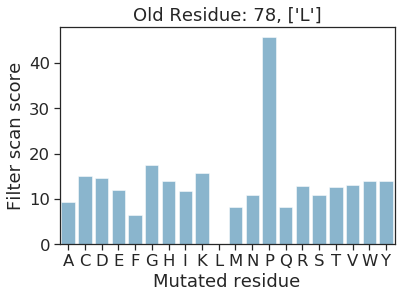

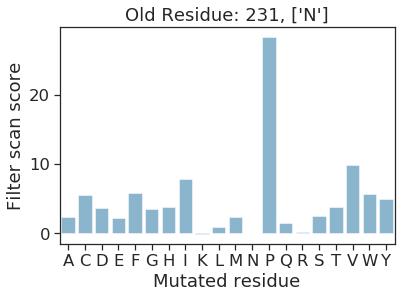

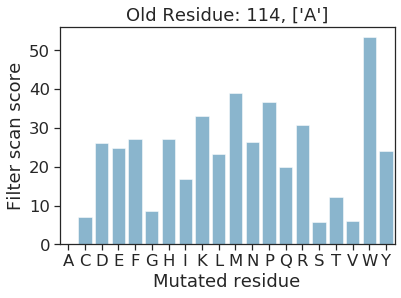

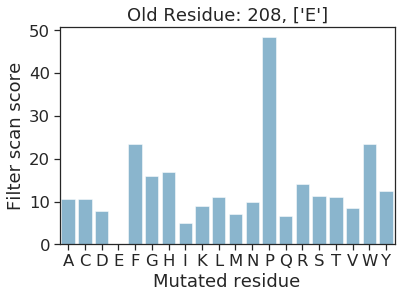

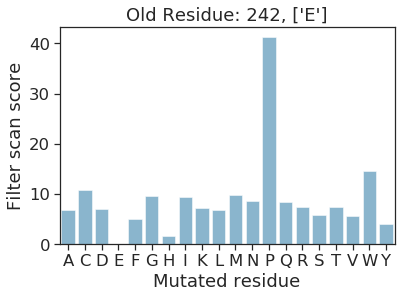

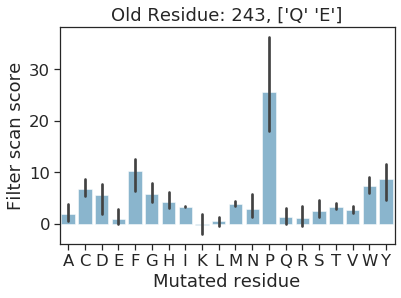

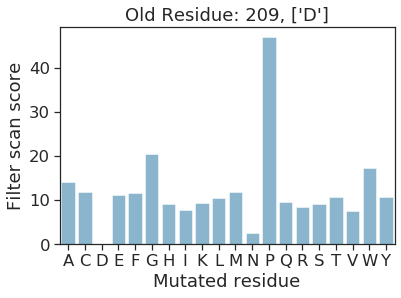

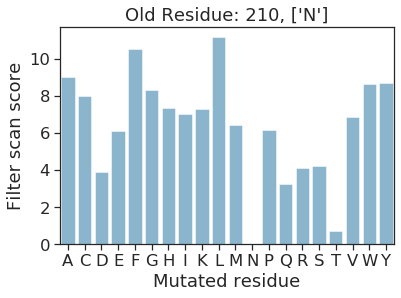

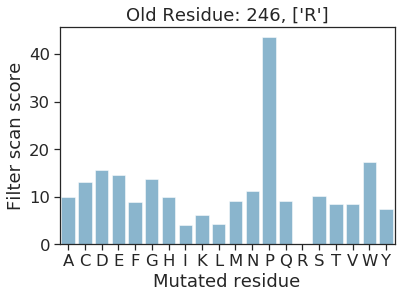

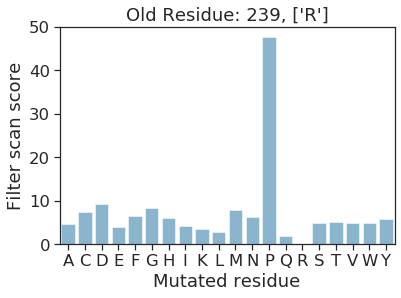

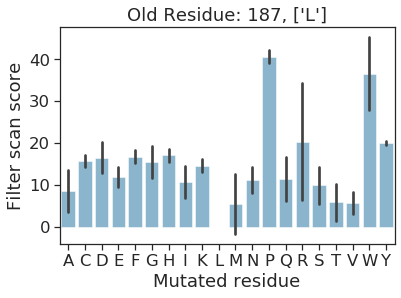

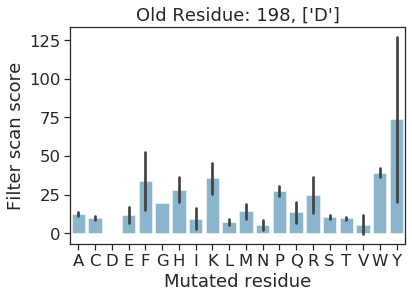

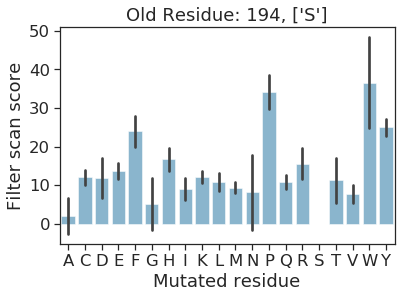

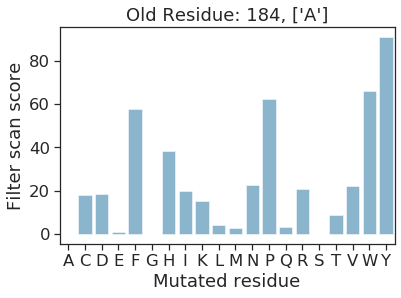

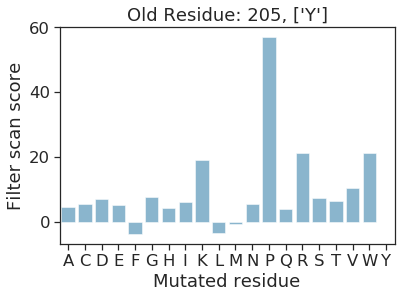

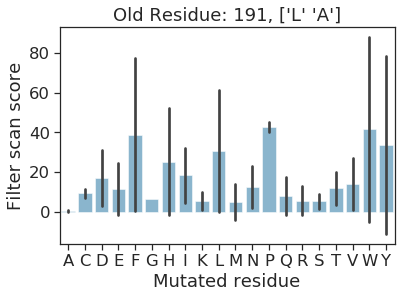

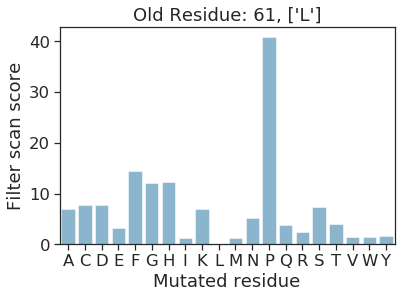

In [6]:
for res_num in mut_resis:
    plot_df = scores_df[scores_df['res_num'] == res_num]
    old_aa = plot_df.old_aa.unique()
    plt.figure()
    sns.barplot(x = 'new_aa', y = 'score_value', data = plot_df, color='b', alpha=0.5)
    #plt.legend(loc='upper right')
    plt.ylabel("Filter scan score")
    plt.xlabel("Mutated residue")  
    plt.title(f'Old Residue: {res_num}, {old_aa}')

## We can also plot our score values for each residue position in one giant plot in the form of a heat map

In [8]:
## First we'll rearrange our dataframe so that the residue numbers are the rows and each potential amino acid are the columns and the score_value occupies the middie
pivot_scores = scores_df.pivot(index='res_num',columns='new_aa')['score_value']

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(pivot_scores, linewidths=.5, center=80)
plt.ylabel('Residue number')
plt.xlabel('Mutated Amino Acid')

## Now let's talk about what these mean: 

In the cell below, describe what the following score terms show in your plots

What does a filter scan score < 0 mean? What about > 0? or = 0?



#less than 0 means it has improved, greater than 0 means the mutation is destabilizing compared to the original AA identity. If it is equal to 0, this means the mutation is equally stable (but in most cases this will probably mean it has been mutated to its original identity).

Which residue positions are more readily mutated? Which of these mutations are more favorable mutations? 

#2, 23, 43, 302,303, 315, 316 seem to tolerate mutations better than many others. Overall, proline seems to be a negative mutation in almost all residues, however the previously mentioned are slightly less bad. 